In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#!pip install seaborn

In [4]:
df=pd.read_csv('train.csv')

In [5]:
df.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [6]:
df.describe()

X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [8]:
df.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [9]:
df.Dates=pd.to_datetime(df.Dates)

In [10]:
df.dtypes

Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
dtype: object

In [11]:
df['month']=df.Dates.dt.month

In [12]:
df['year']=df.Dates.dt.year

In [13]:

df['days']=df.Dates.dt.day

In [14]:
df.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  month  year  days  
0 -122.425892  37.774599      5  2015    13  
1 -122.425892  37.774599      5  2015    13  
2 -122.424363  37.800414      5  2015    13  
3 -122.426995  37.800873      5  2015    13  
4 -122.438738  37.771541      5  2015    13

In [15]:
import re
df['corner'] = df.Address.map(lambda x:1 if re.findall('/', x) else 0)

In [16]:
df.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  month  year  days  corner  
0 -122.425892  37.774599      5  2015    13       1  
1 -122.425892  37.774599      5  2015    13       1  
2 -122.424363  37.800414      5  2015    13       1  
3 -122.426995  37.800873      5  2015    13       0  
4 -122.438738  37.771541      5  2015    13       0

In [17]:
#df.to_csv('sfo_crime.csv')

In [18]:
df.Resolution.value_counts()

NONE                                      526790
ARREST, BOOKED                            206403
ARREST, CITED                              77004
LOCATED                                    17101
PSYCHOPATHIC CASE                          14534
UNFOUNDED                                   9585
JUVENILE BOOKED                             5564
COMPLAINANT REFUSES TO PROSECUTE            3976
DISTRICT ATTORNEY REFUSES TO PROSECUTE      3934
NOT PROSECUTED                              3714
JUVENILE CITED                              3332
PROSECUTED BY OUTSIDE AGENCY                2504
EXCEPTIONAL CLEARANCE                       1530
JUVENILE ADMONISHED                         1455
JUVENILE DIVERTED                            355
CLEARED-CONTACT JUVENILE FOR MORE INFO       217
PROSECUTED FOR LESSER OFFENSE                 51
Name: Resolution, dtype: int64

In [19]:
df.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [20]:
df.year.value_counts()

2013    75606
2014    74766
2003    73902
2004    73422
2012    71731
2005    70779
2008    70174
2006    69909
2009    69000
2007    68015
2011    66619
2010    66542
2015    27584
Name: year, dtype: int64

In [21]:
df2=df[df.Category == 'ASSAULT']

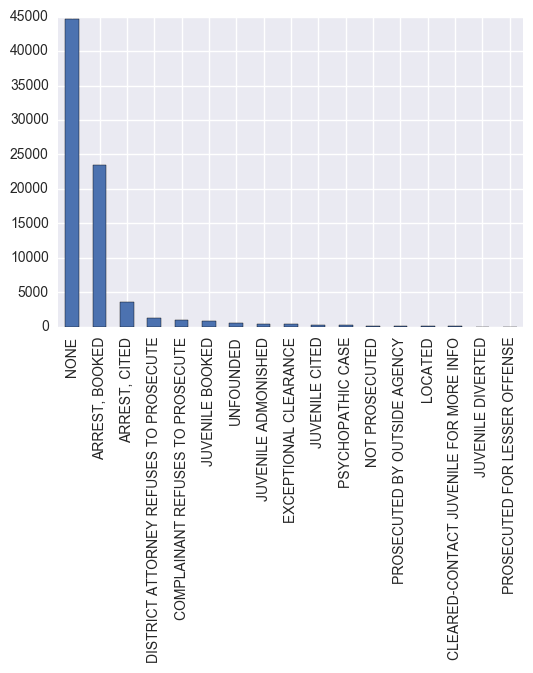

In [22]:
df2.Resolution.value_counts().plot(kind='bar')

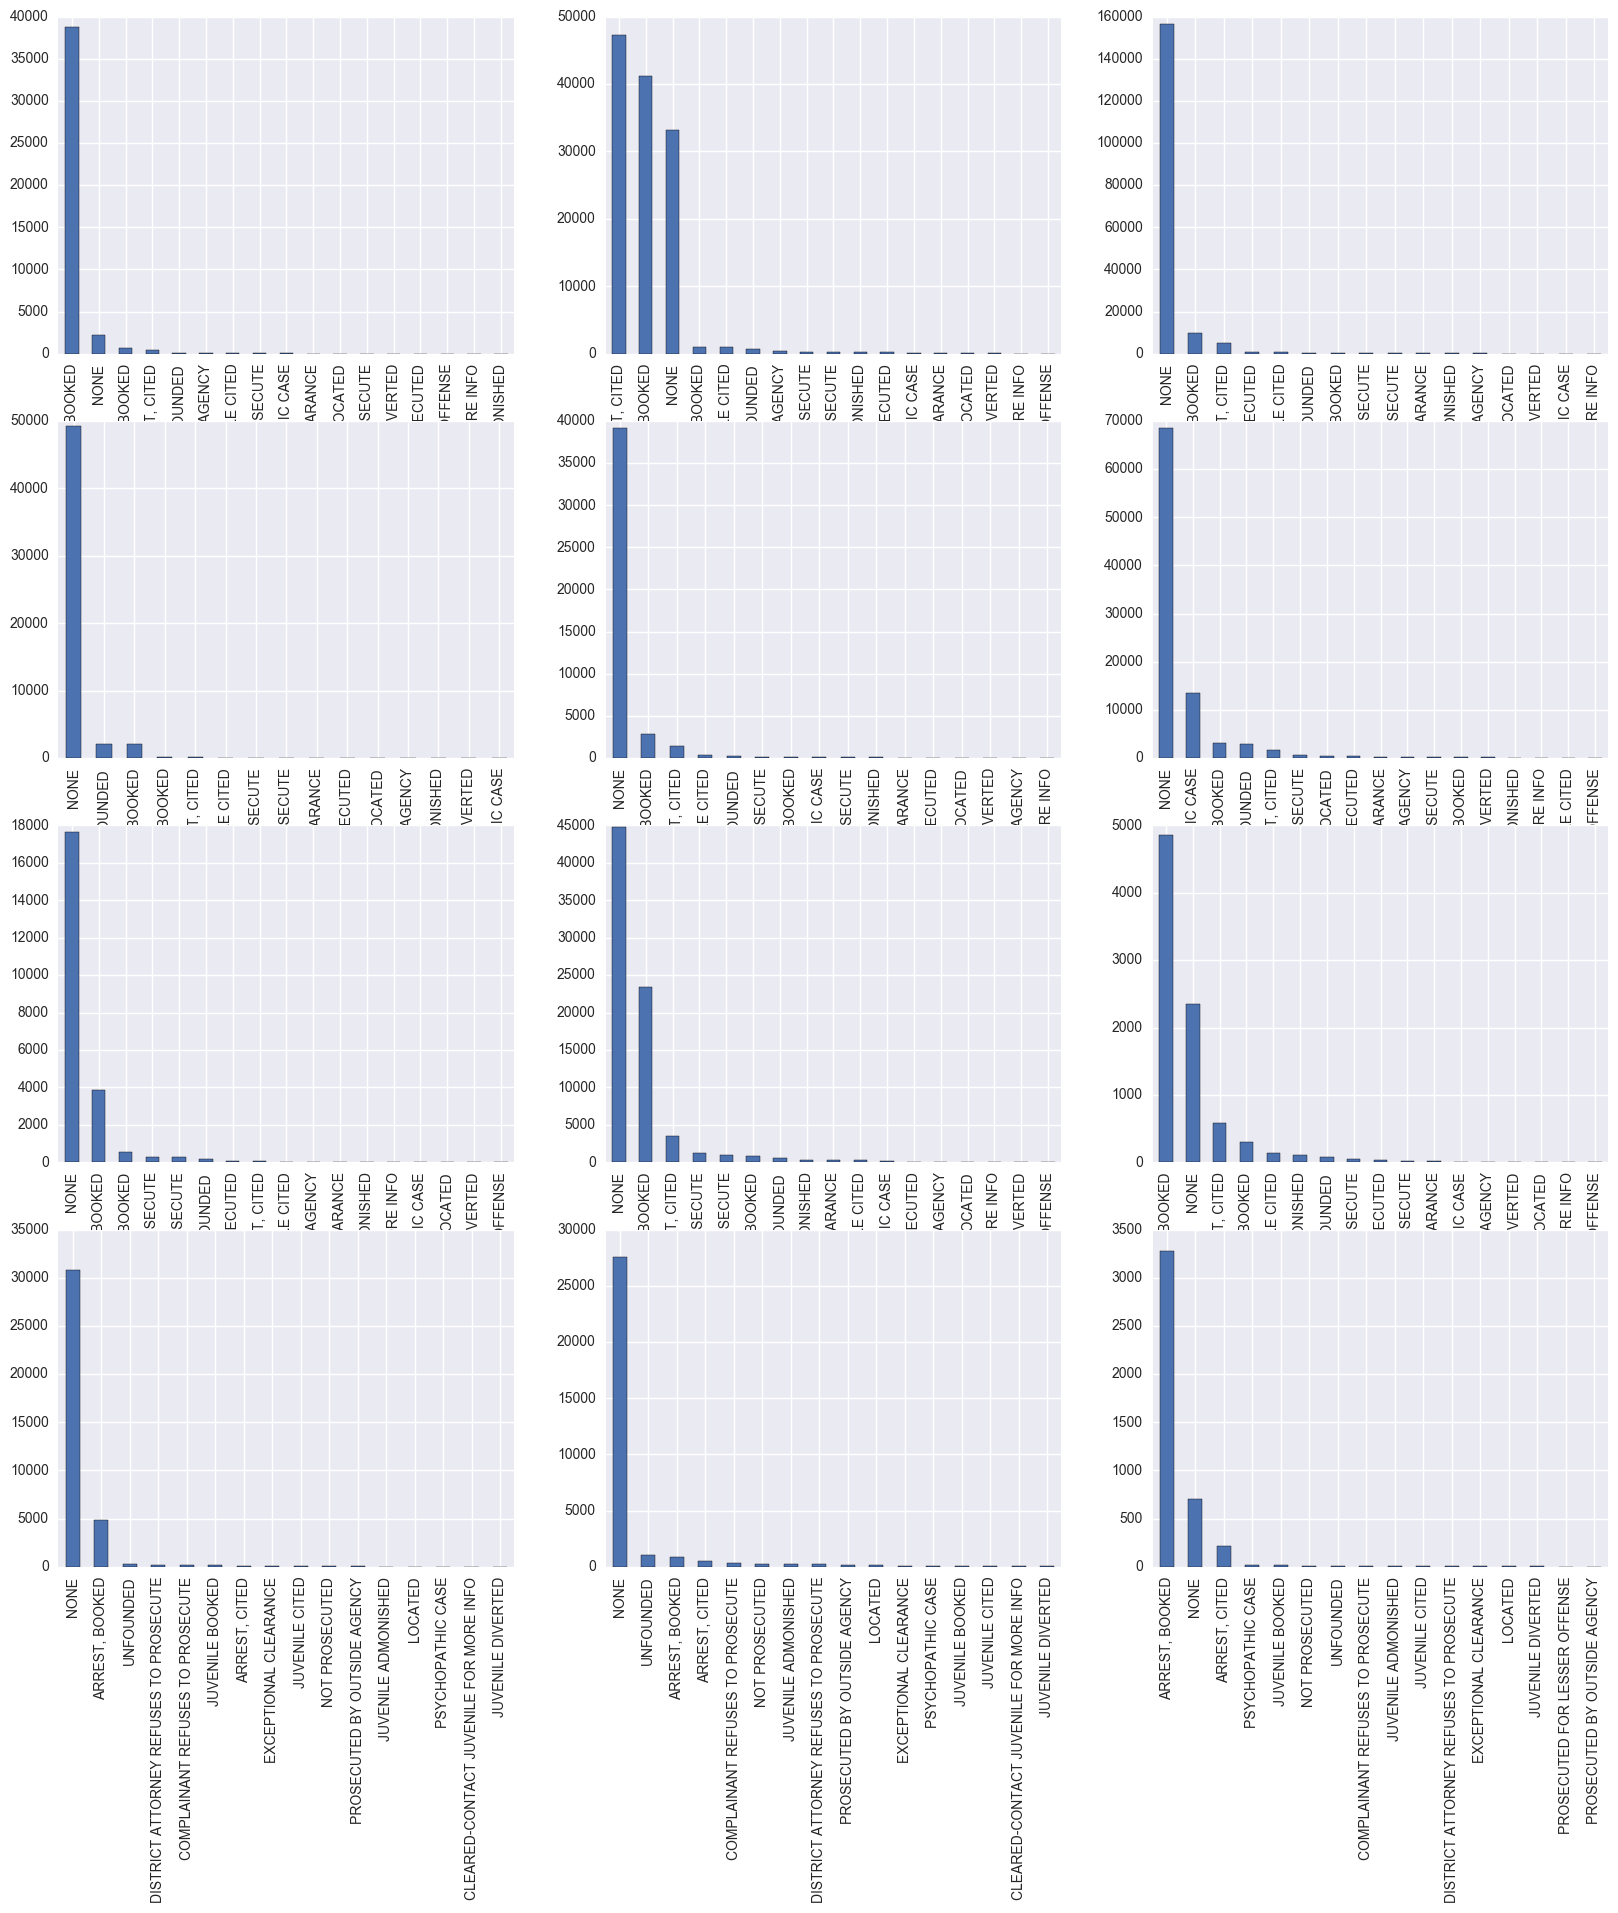

In [23]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = \
plt.subplots(nrows=4,ncols=3,figsize=(20,20))
ax_list=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]

for x ,i in zip(df.Category.unique()[:12],ax_list):
    df[df.Category ==x].Resolution.value_counts().plot(kind='bar',ax=i)

In [24]:
#!pip install plotly

In [25]:
#!pip install --upgrade plotly

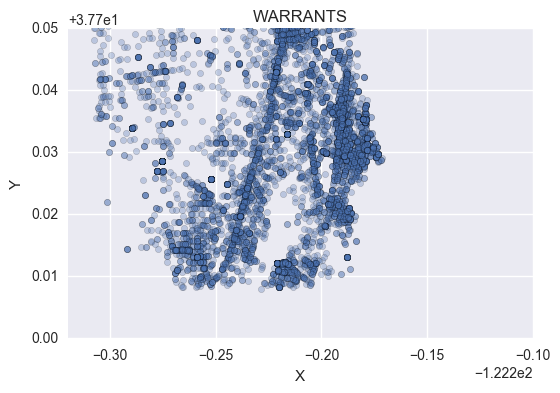

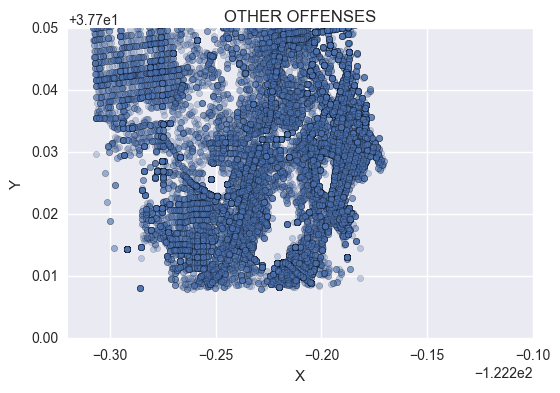

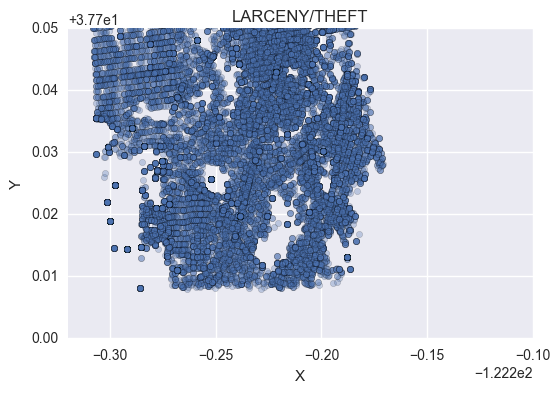

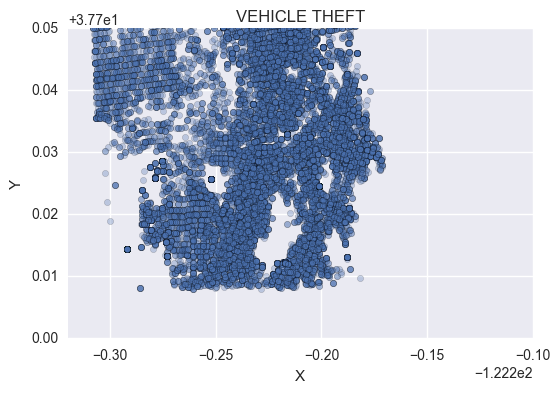

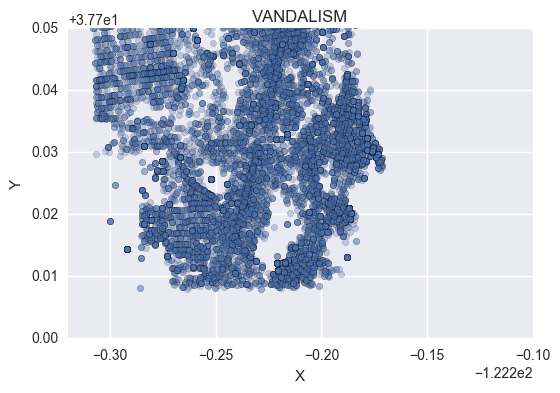

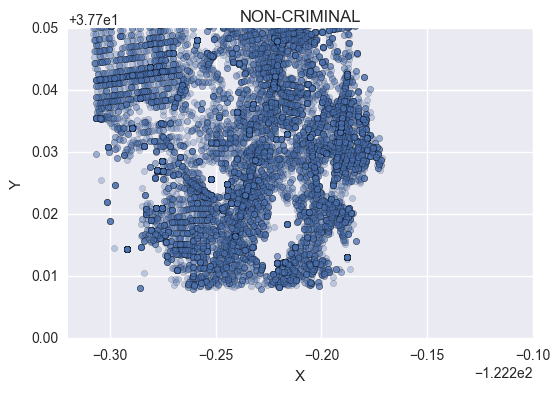

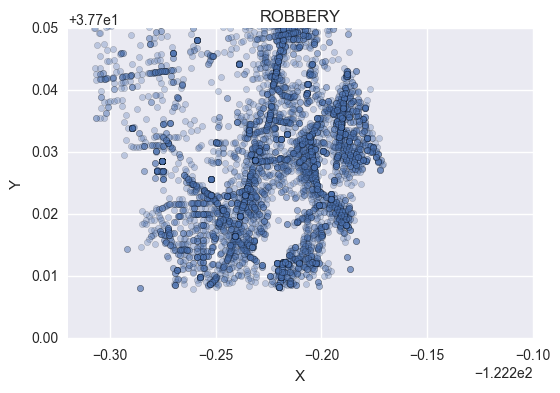

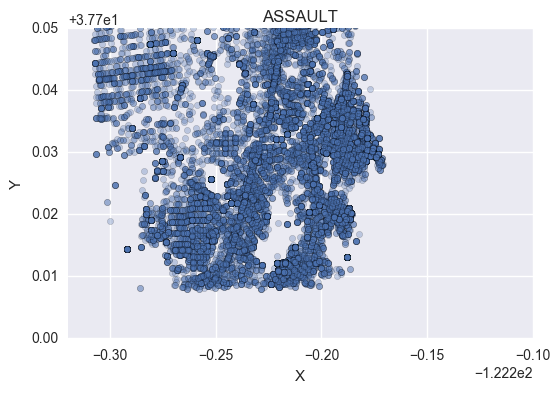

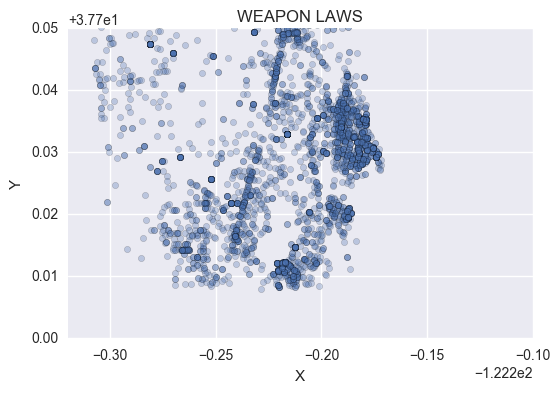

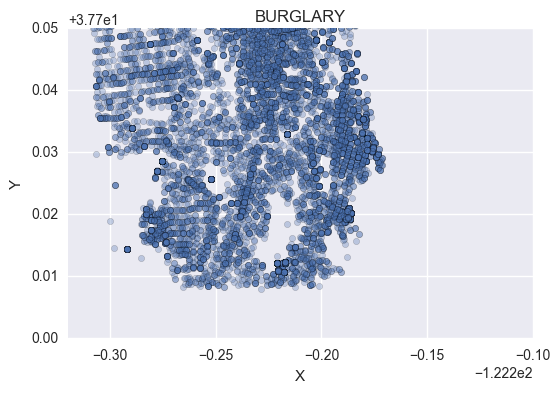

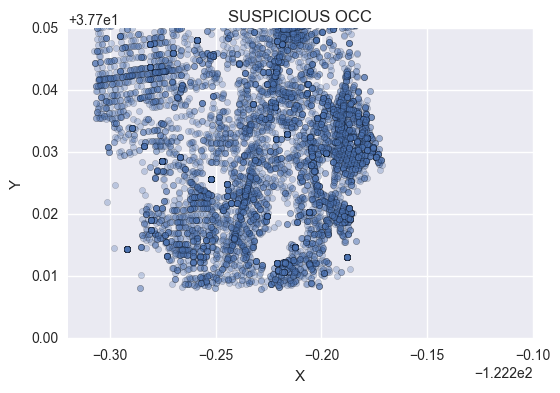

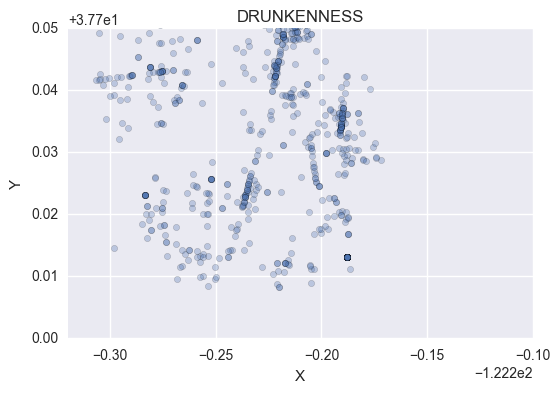

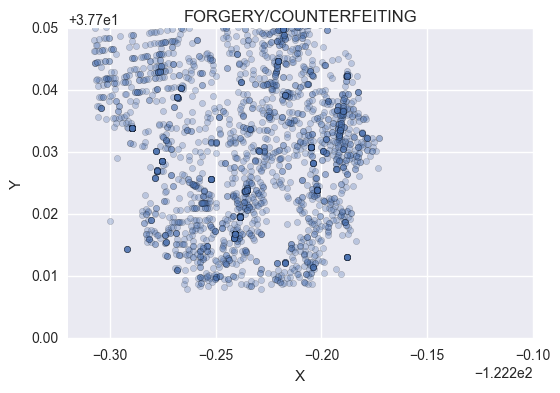

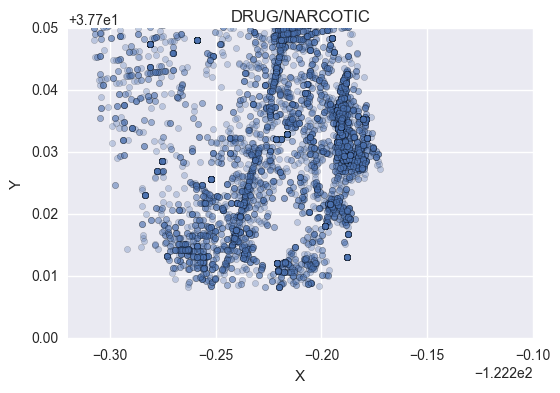

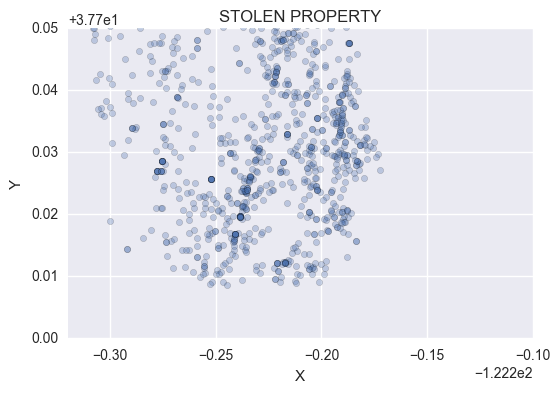

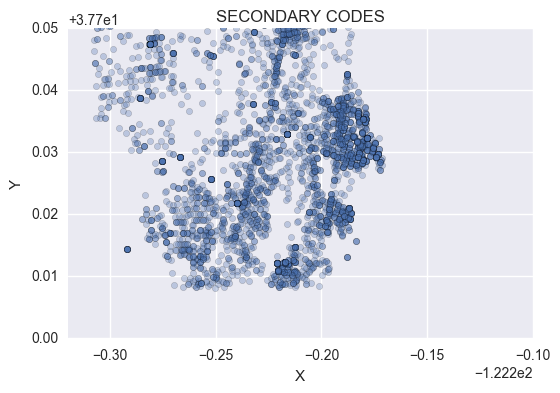

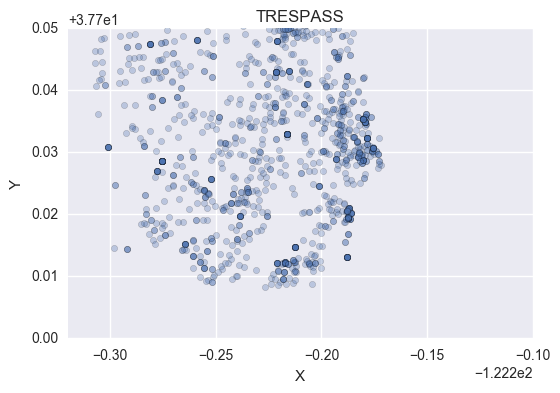

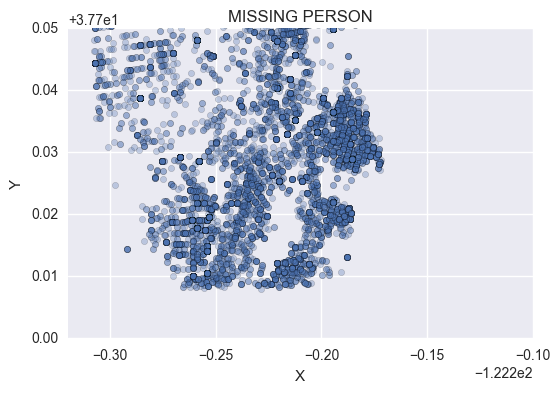

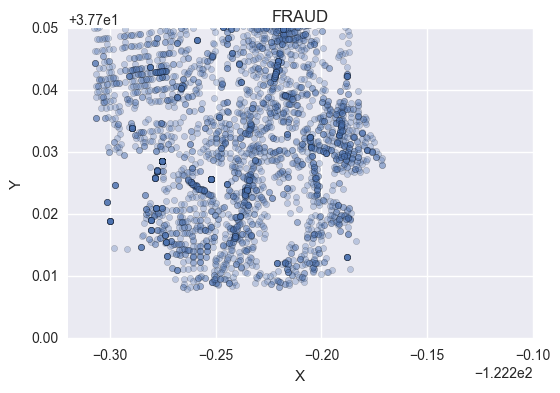

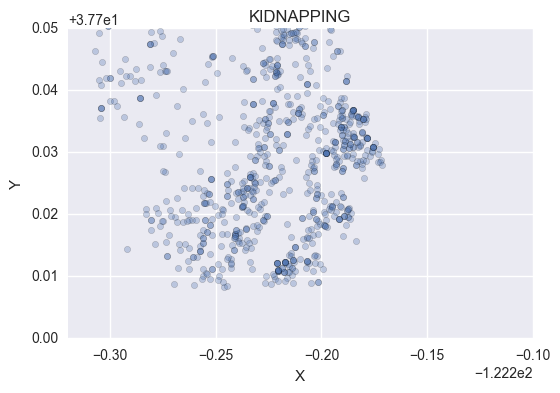

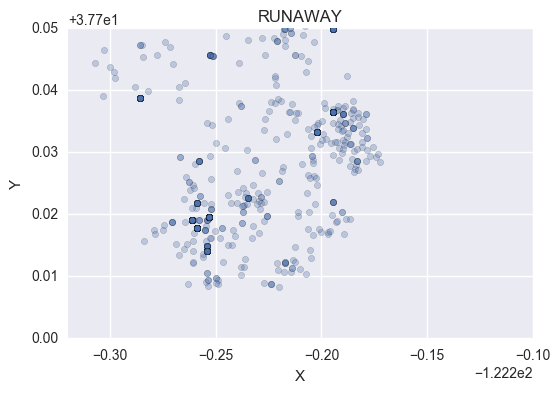

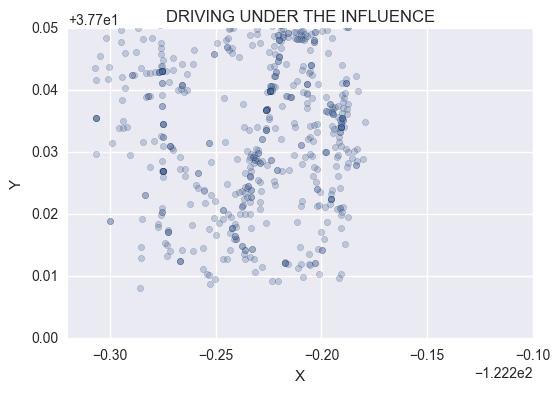

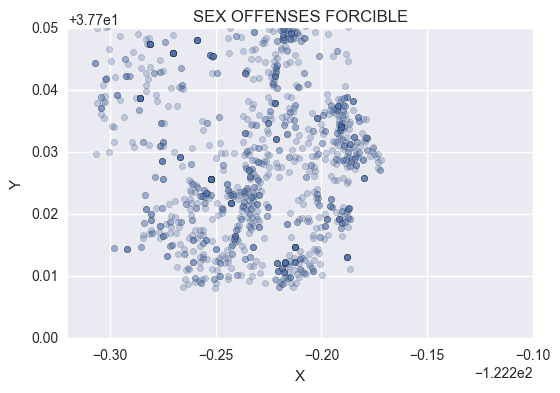

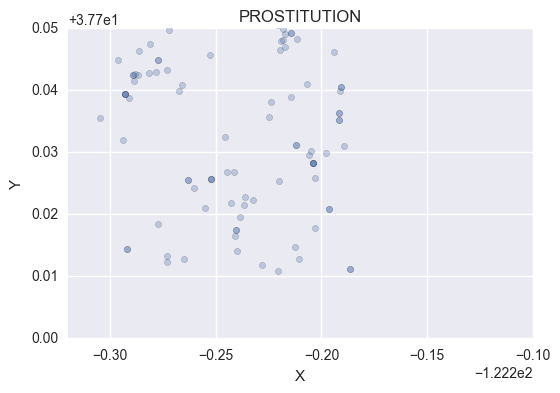

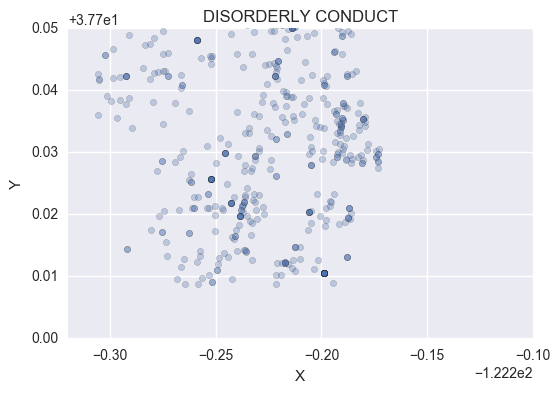

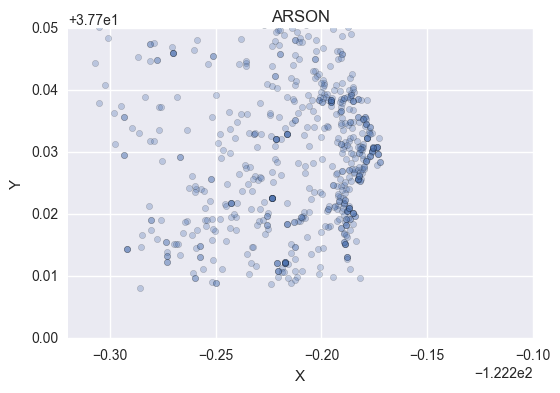

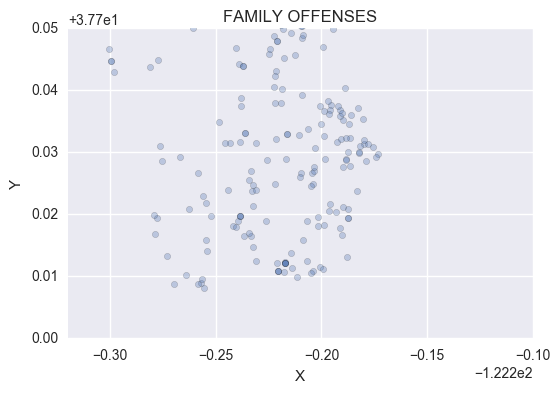

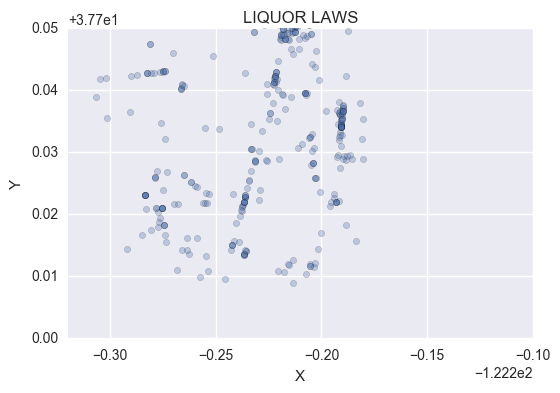

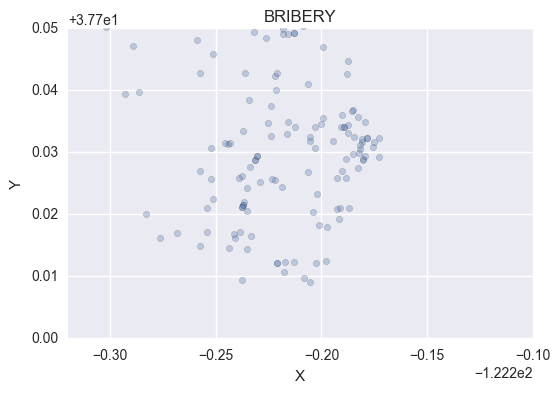

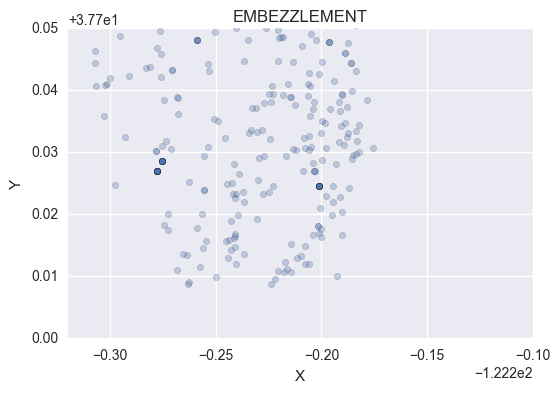

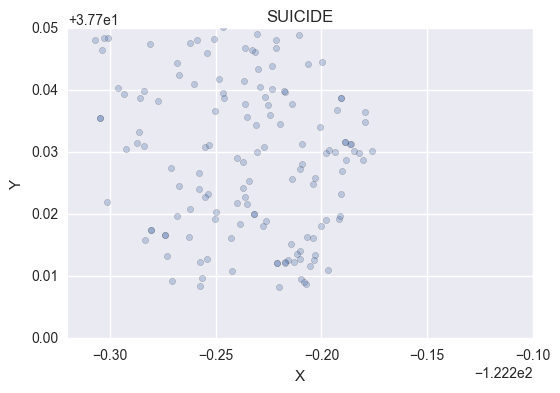

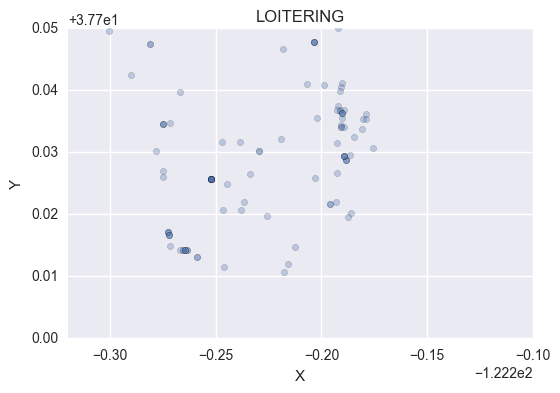

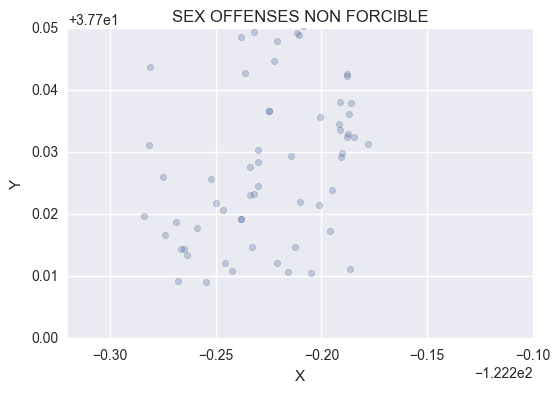

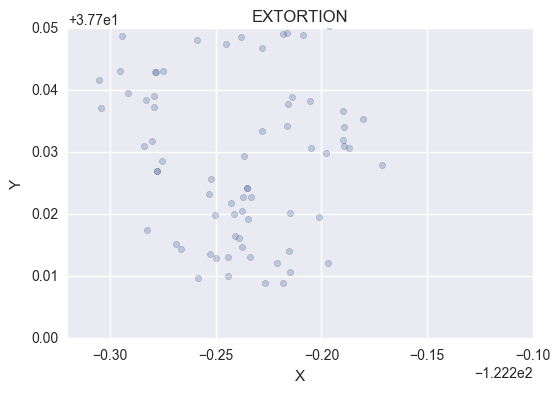

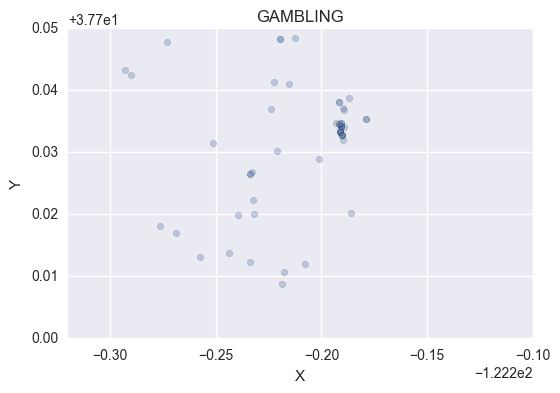

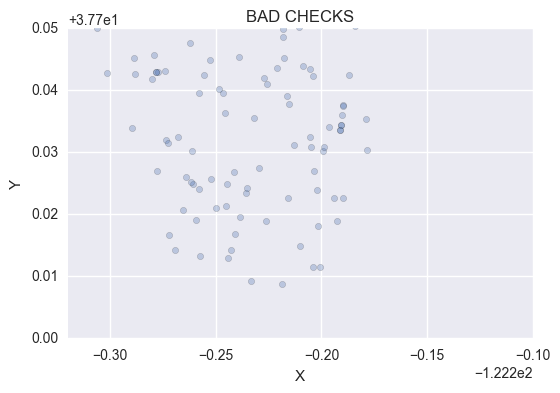

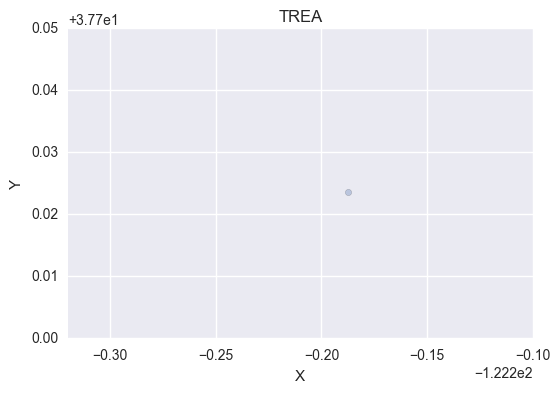

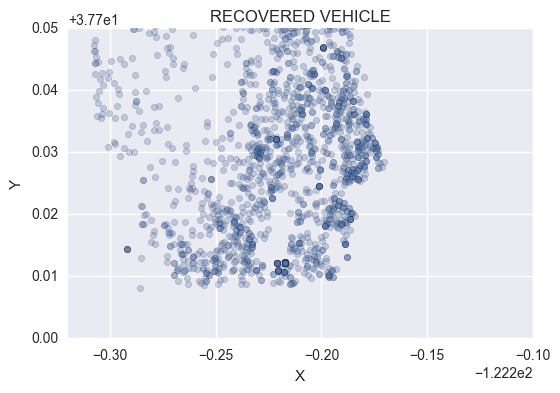

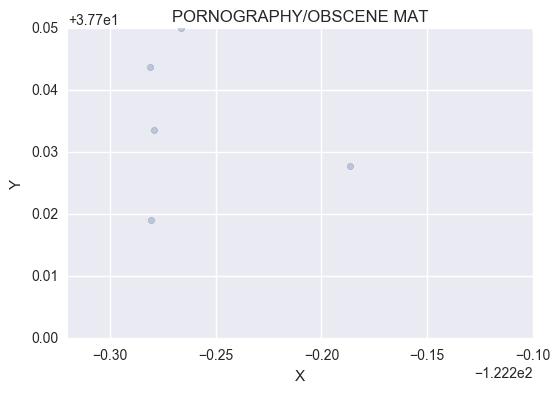

In [26]:
for i in df.Category.unique().tolist():
    df2=df[df.Category==i]
    df2.plot(kind='scatter',x='X',y='Y',alpha=0.3)
    plt.title(i)
    plt.xlim(-122.52,-122.3)
    plt.ylim(37.7,37.75)
    plt.show()

In [27]:
# m = ["Mon", "Tue", "Wed", "Thu", "Fri","Sat",'Sun']

In [28]:
# for i in df.Category.unique().tolist():
#     df3=df[df.Category==i]
#     df3.DayOfWeek.value_counts().sort_values(m.index).plot(kind='bar')
#     plt.title(i)
#     plt.show()

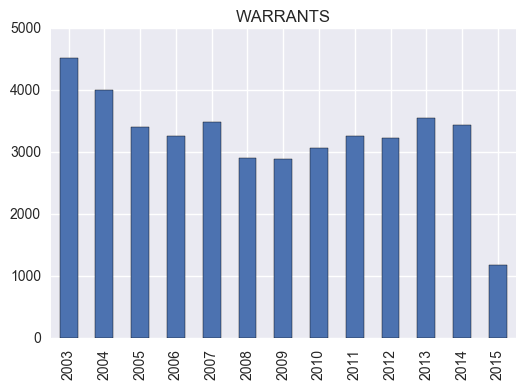

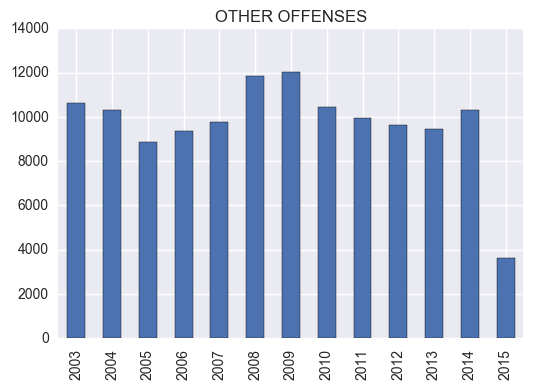

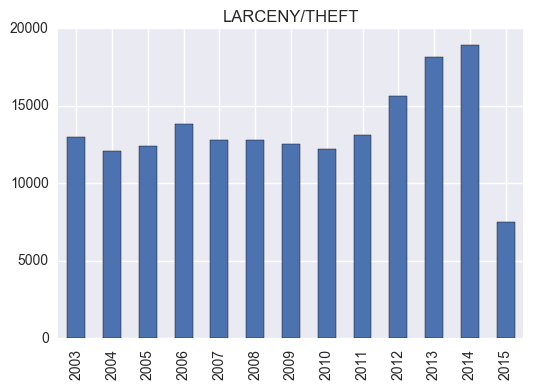

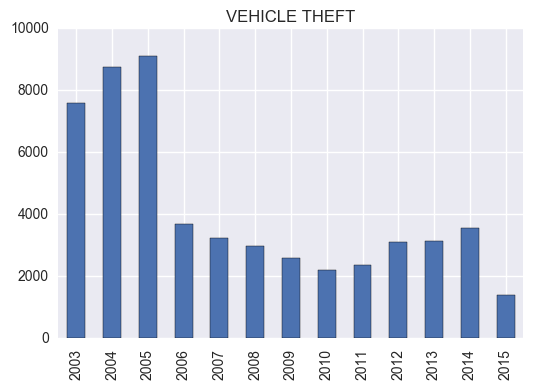

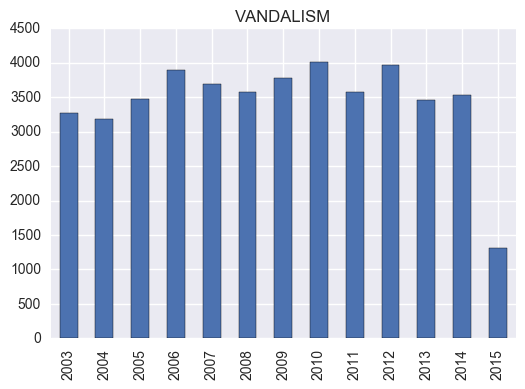

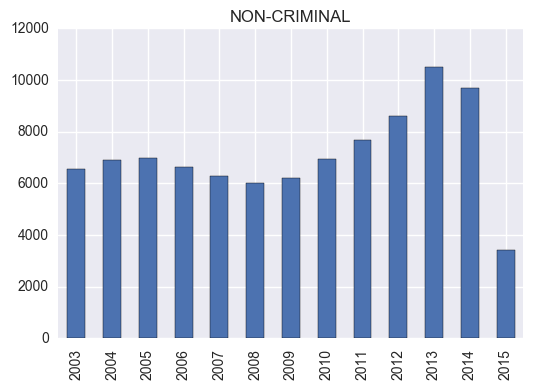

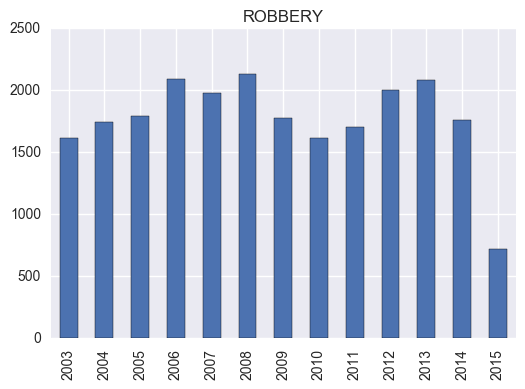

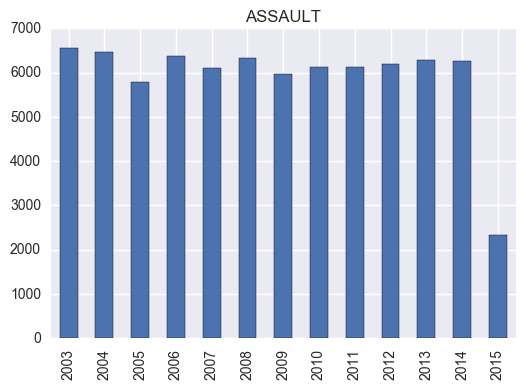

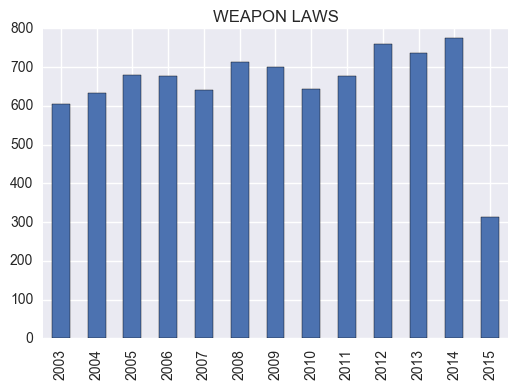

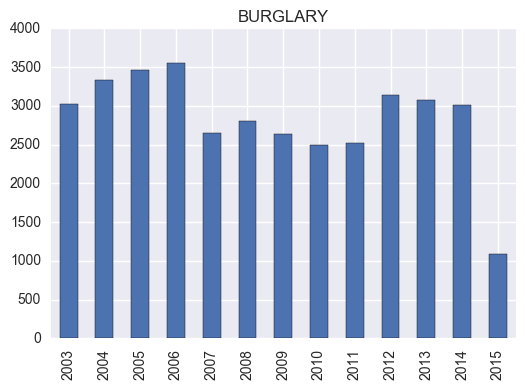

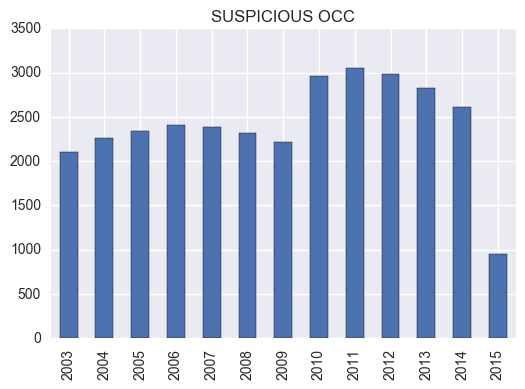

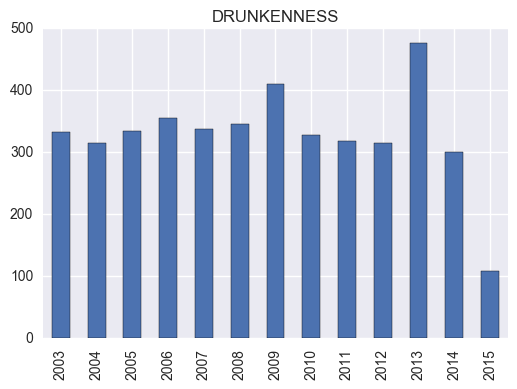

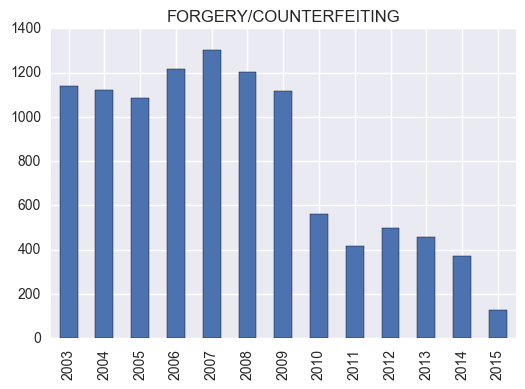

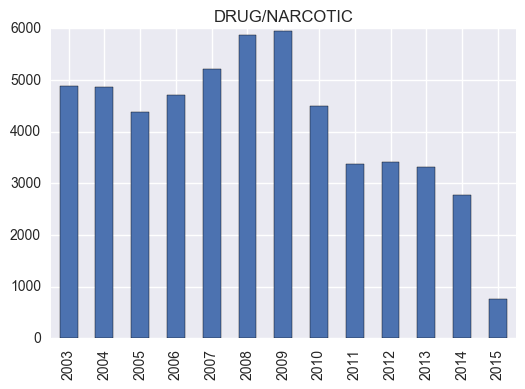

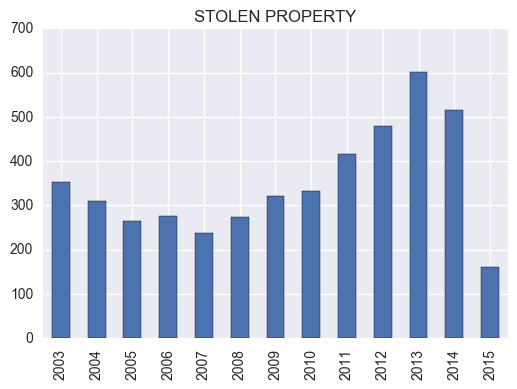

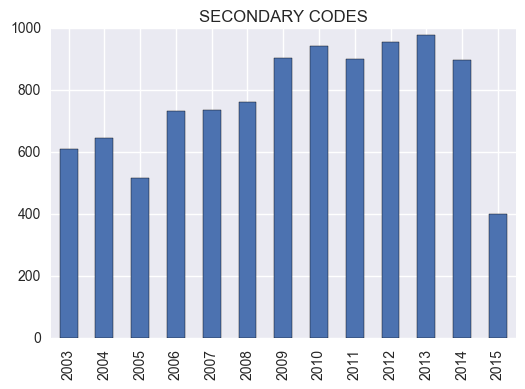

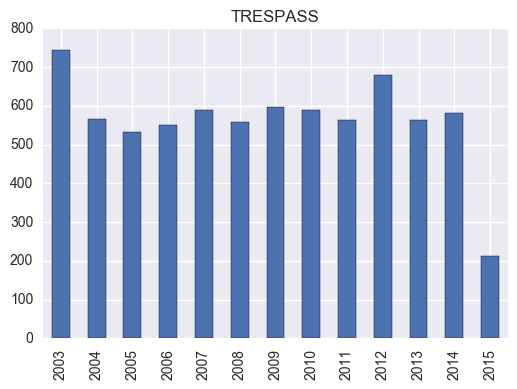

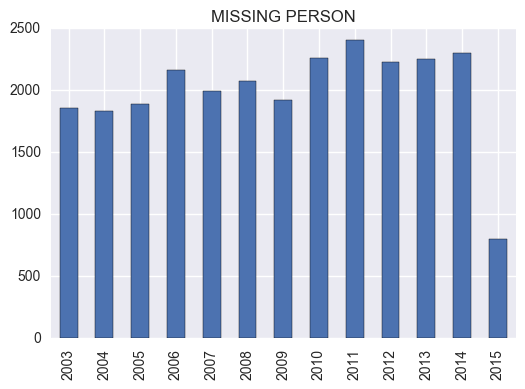

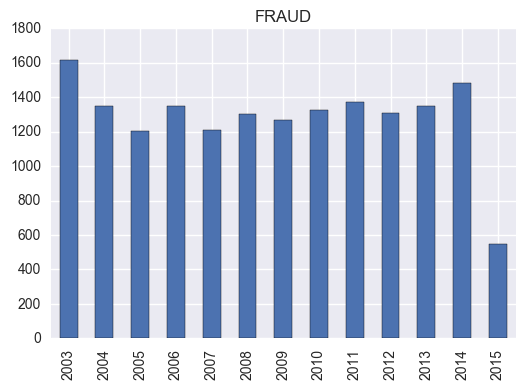

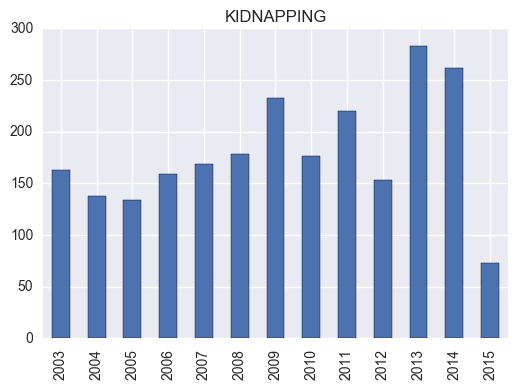

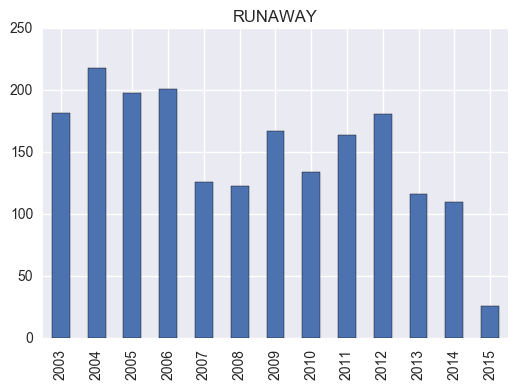

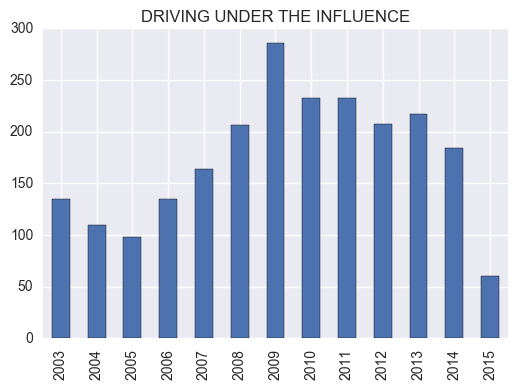

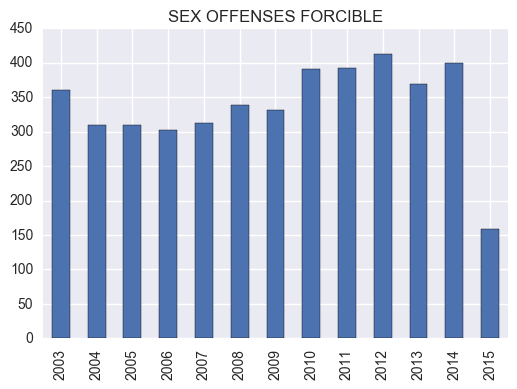

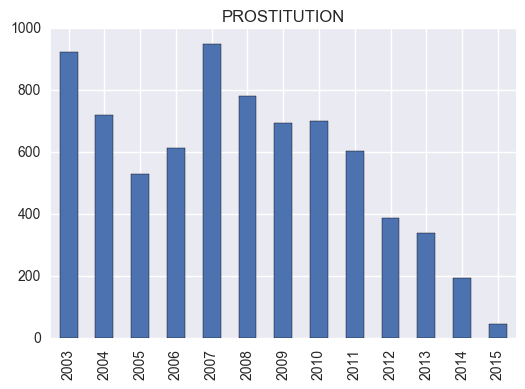

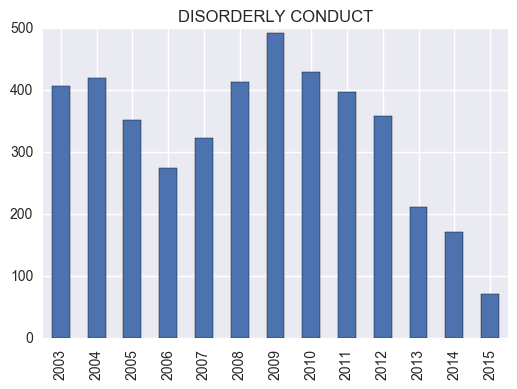

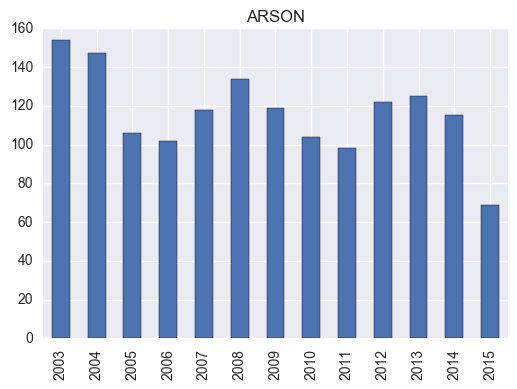

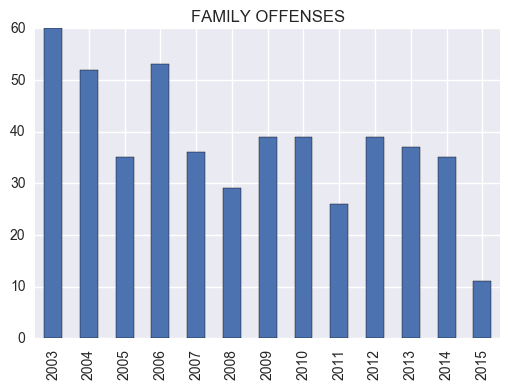

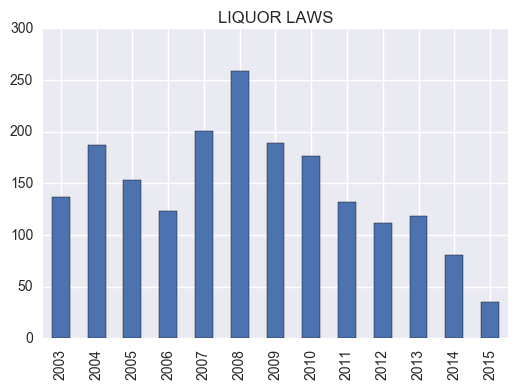

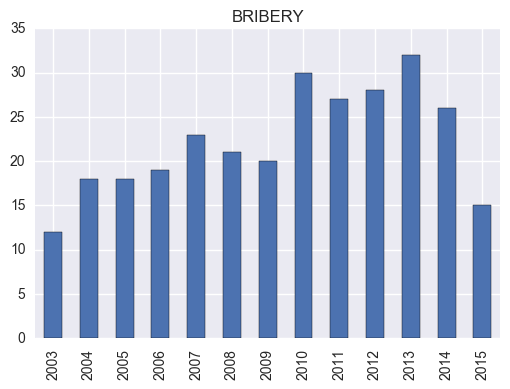

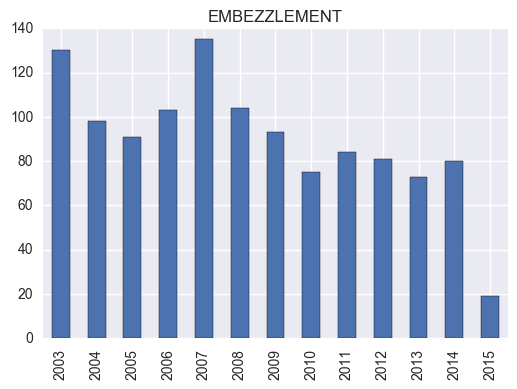

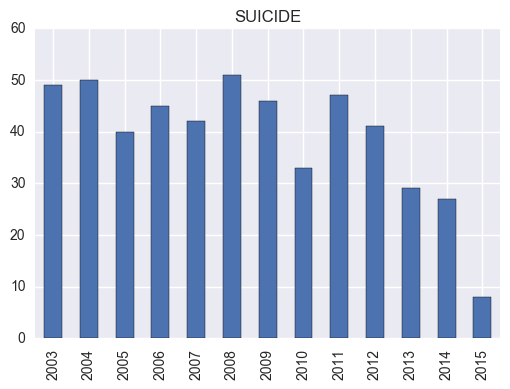

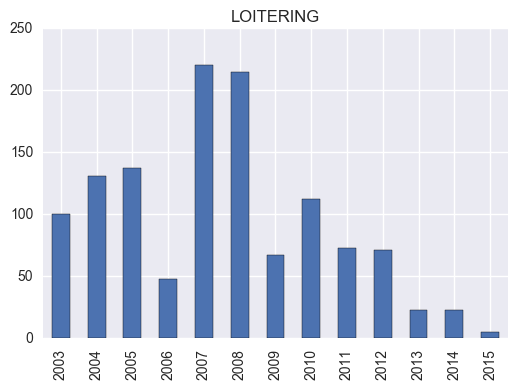

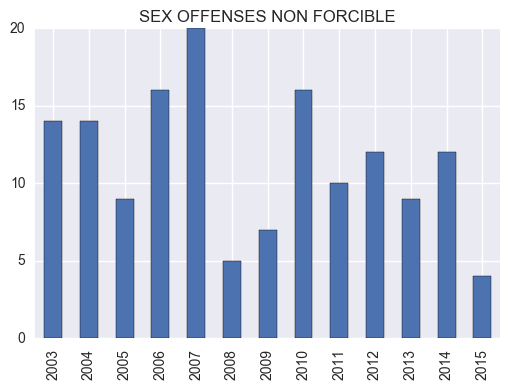

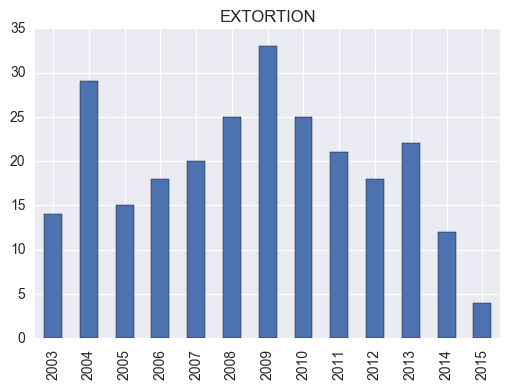

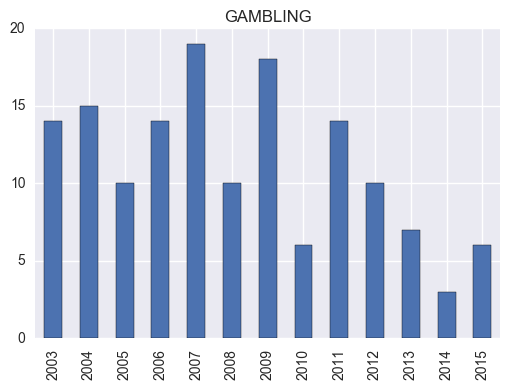

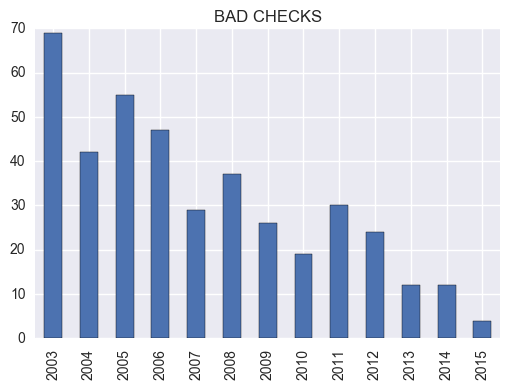

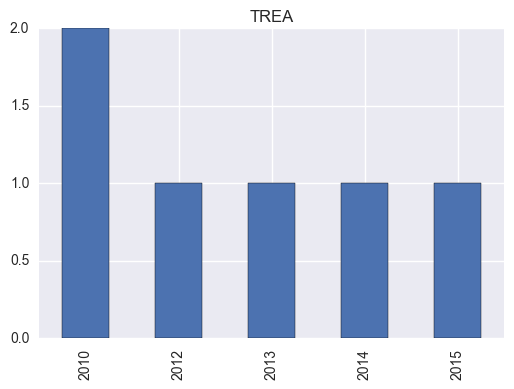

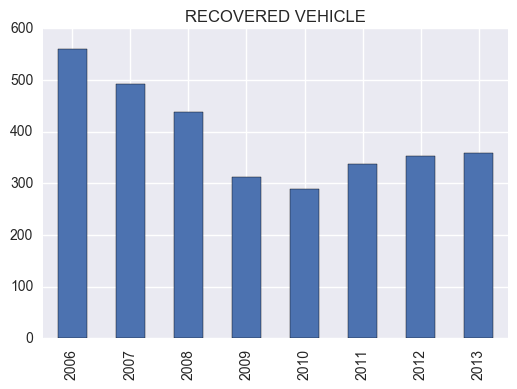

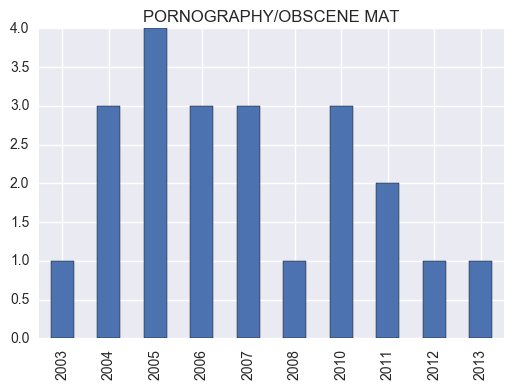

In [29]:
for i in df.Category.unique().tolist():
    df3=df[df.Category==i]
    df3.year.value_counts().sort_index(ascending=True).plot(kind='bar')
    plt.title(i)
    plt.show()

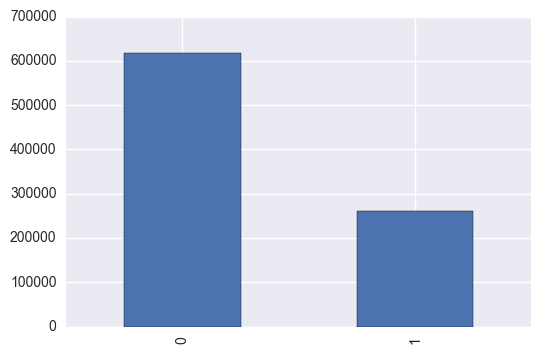

In [30]:
df.corner.value_counts().plot(kind='bar')

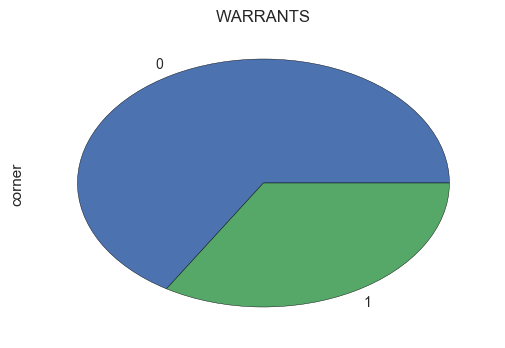

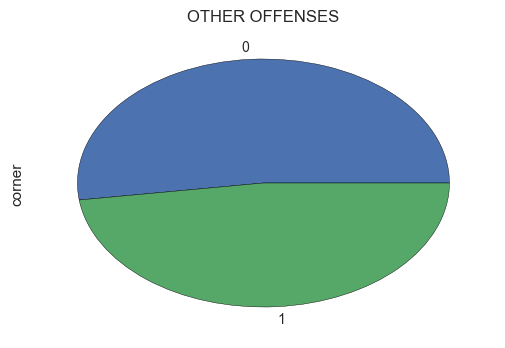

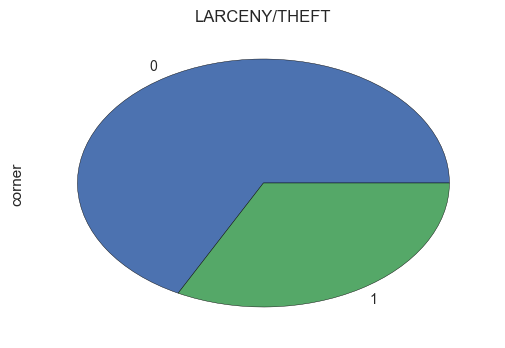

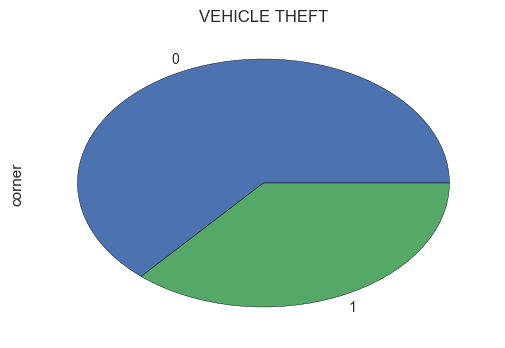

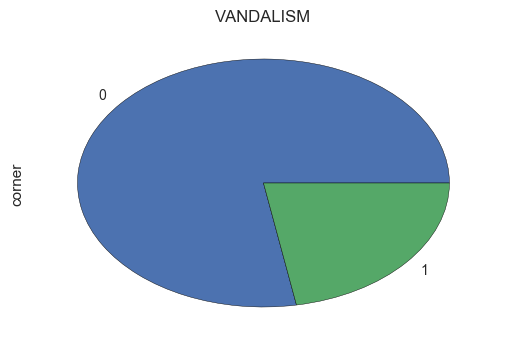

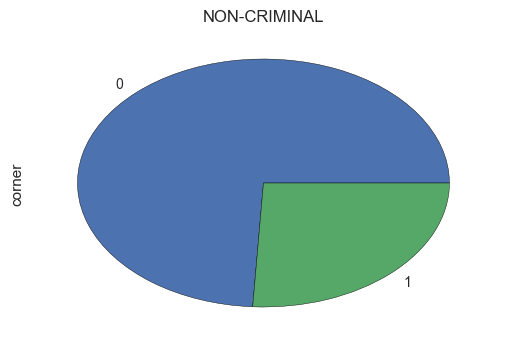

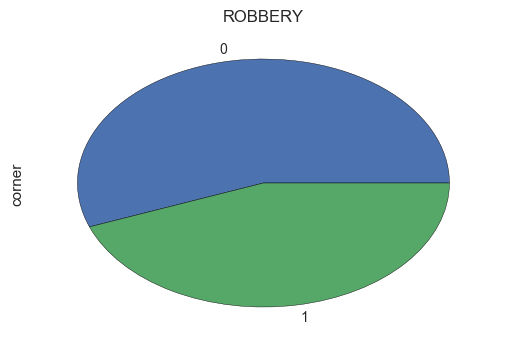

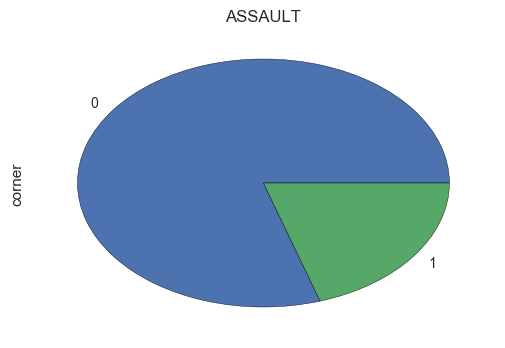

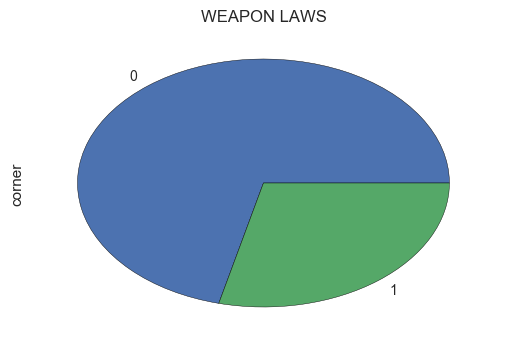

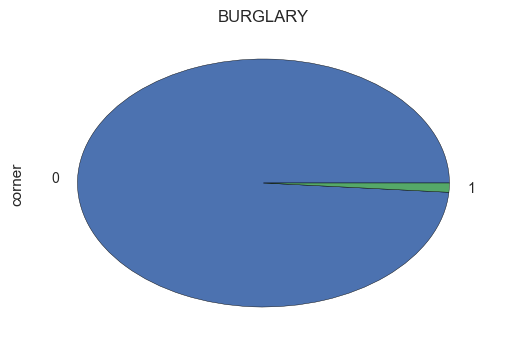

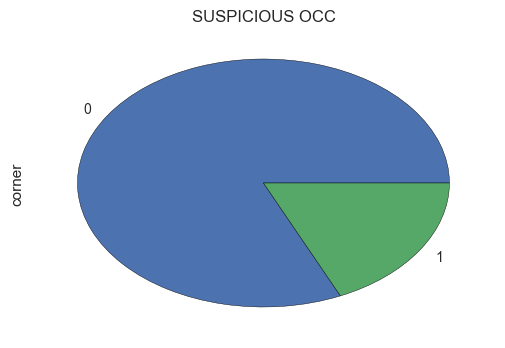

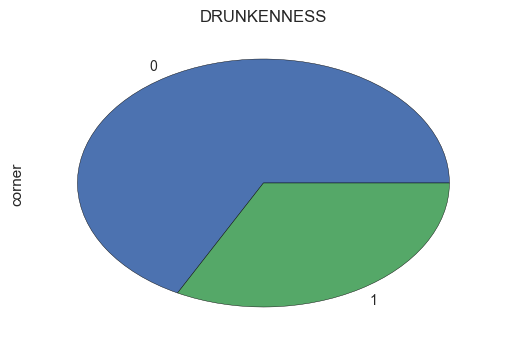

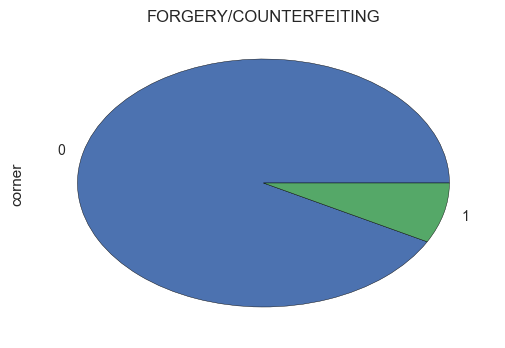

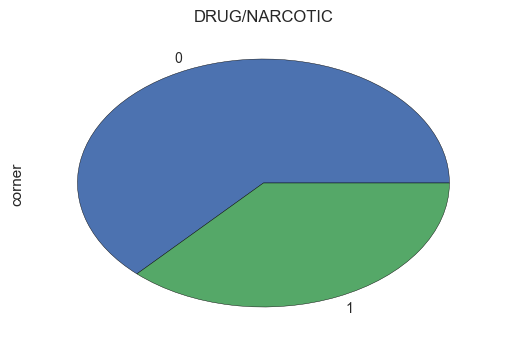

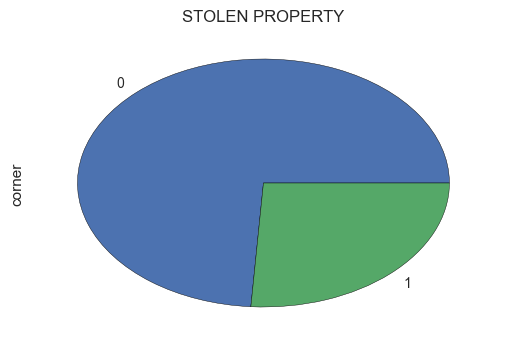

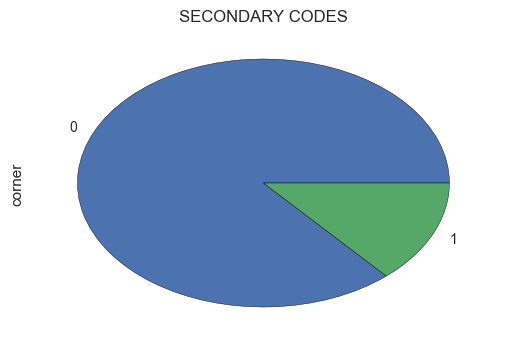

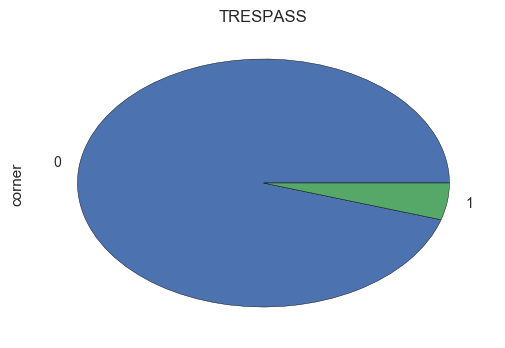

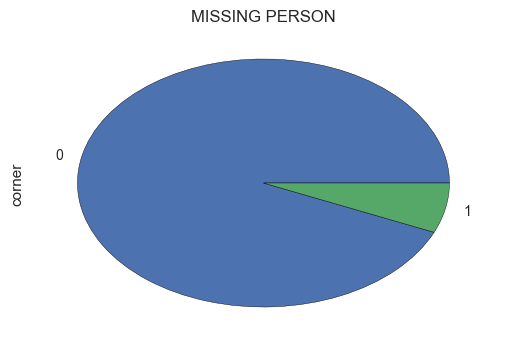

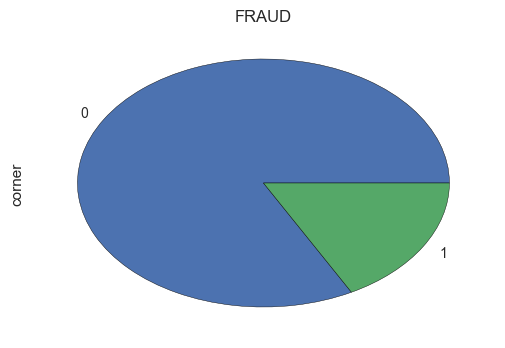

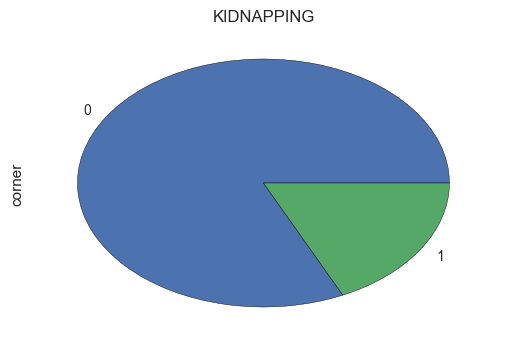

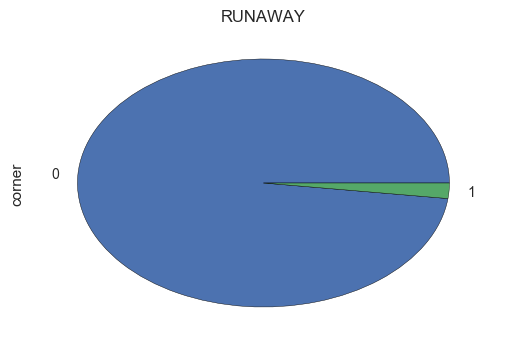

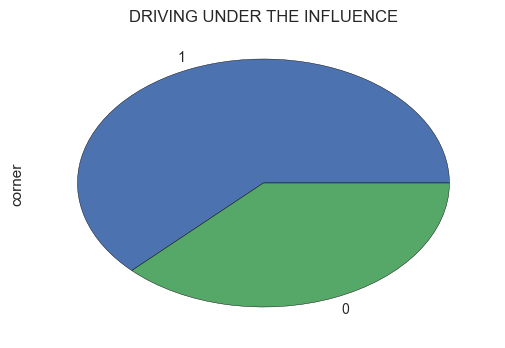

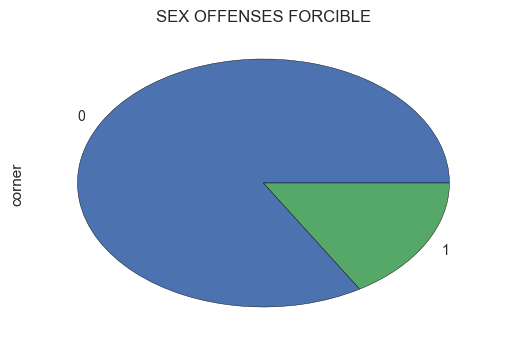

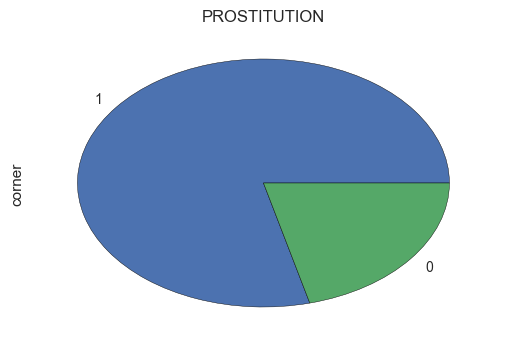

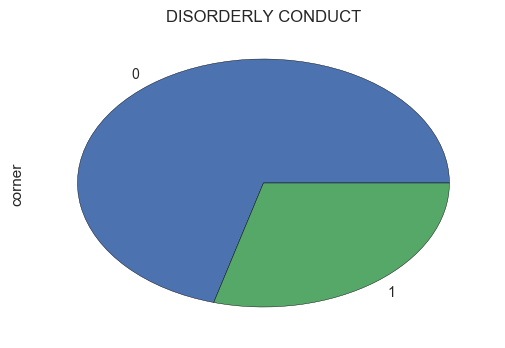

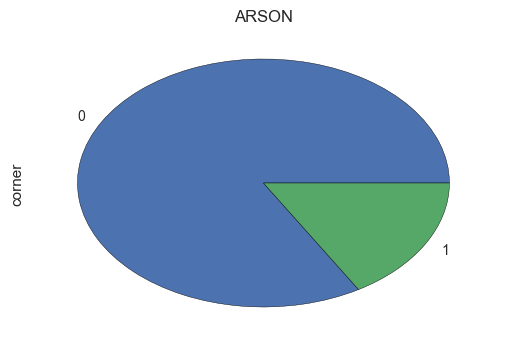

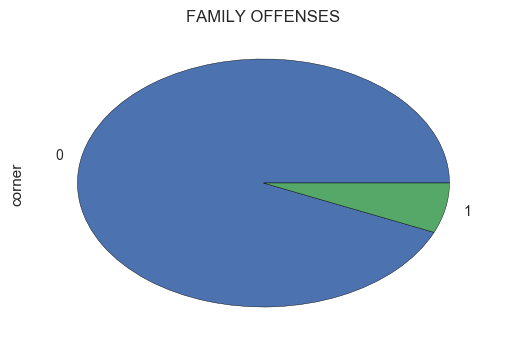

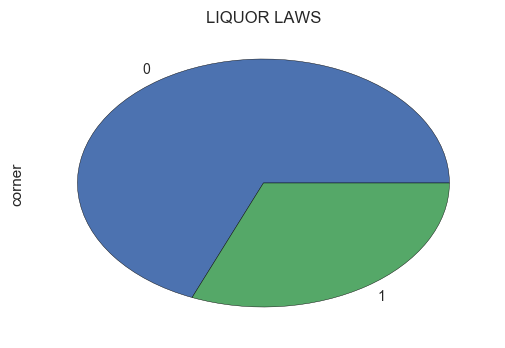

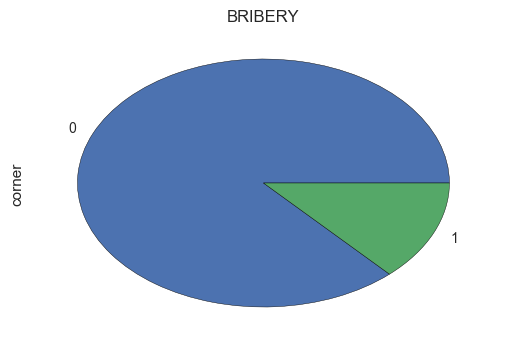

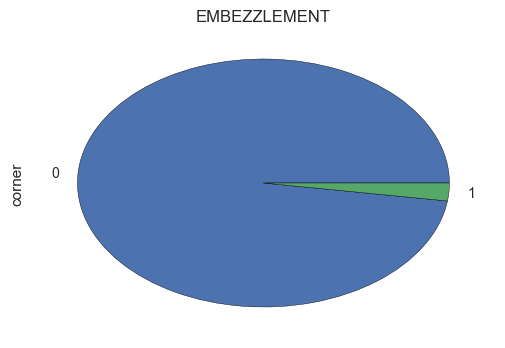

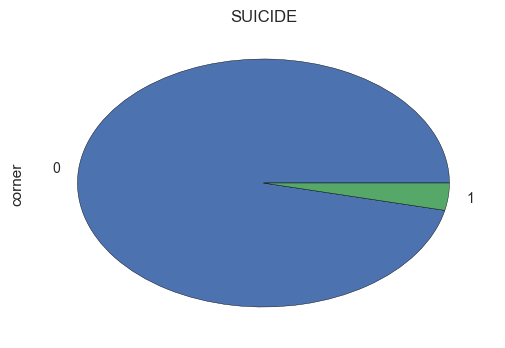

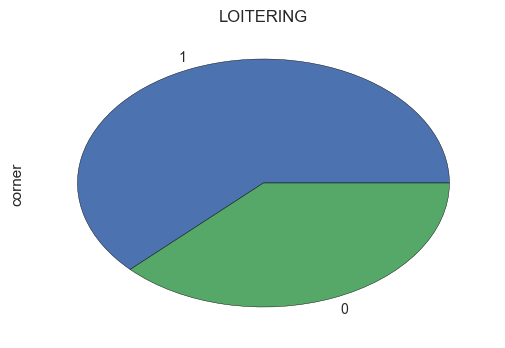

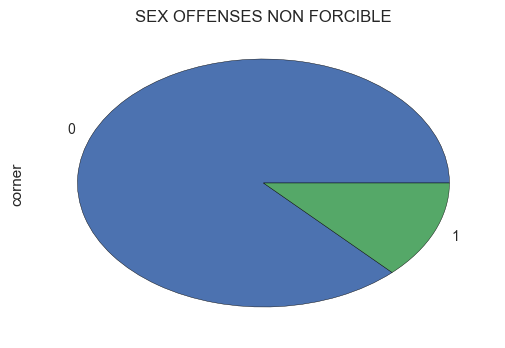

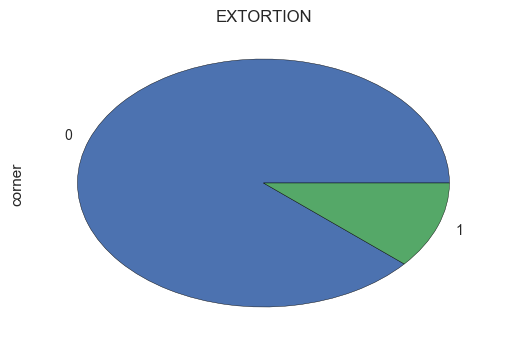

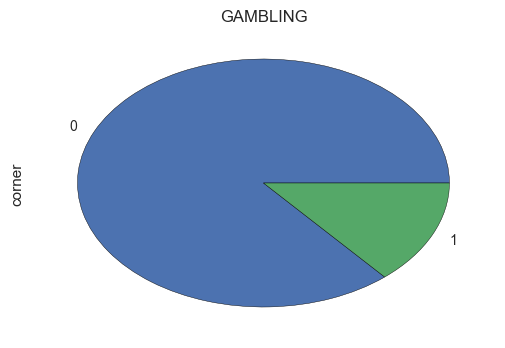

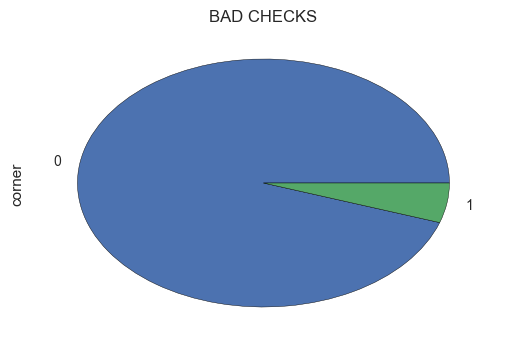

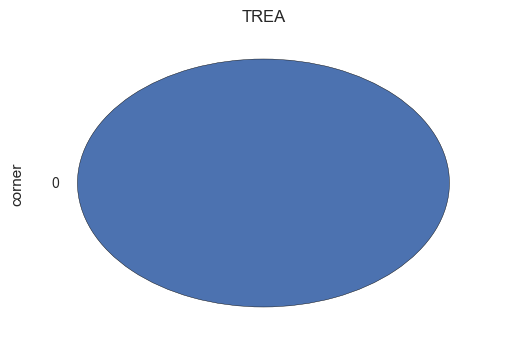

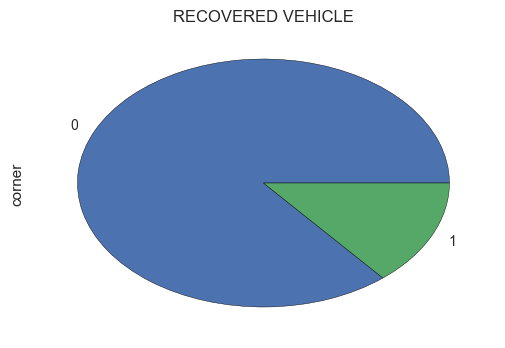

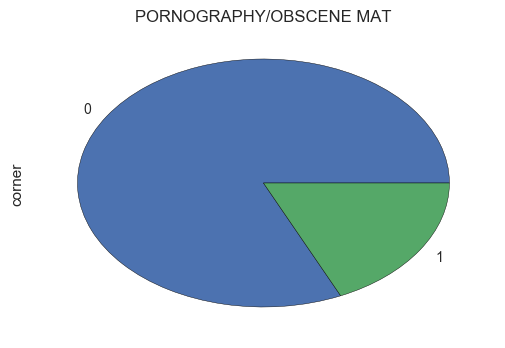

In [31]:
for i in df.Category.unique().tolist():
    df3=df[df.Category==i]
    df3.corner.value_counts().plot(kind='pie')
    plt.title(i)
    plt.show()

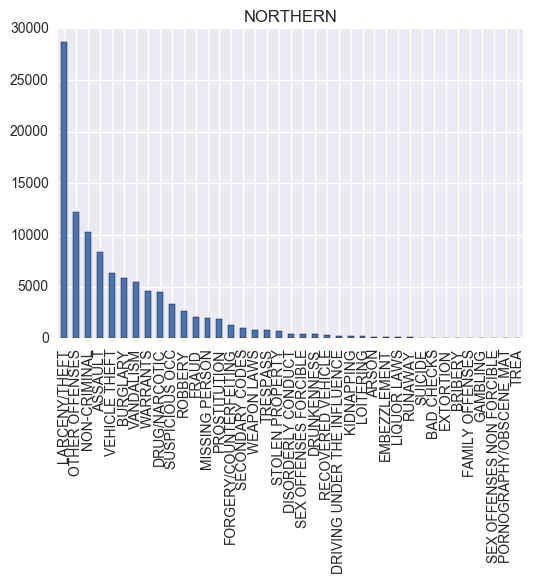

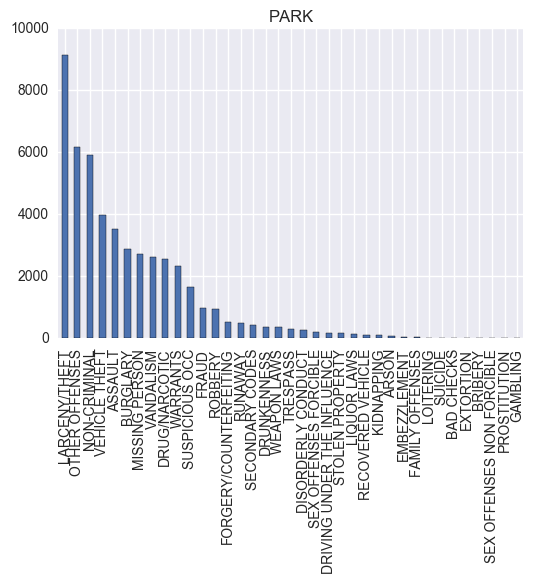

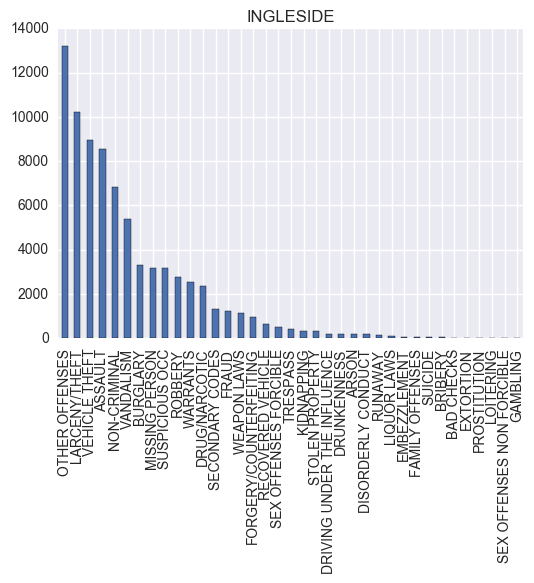

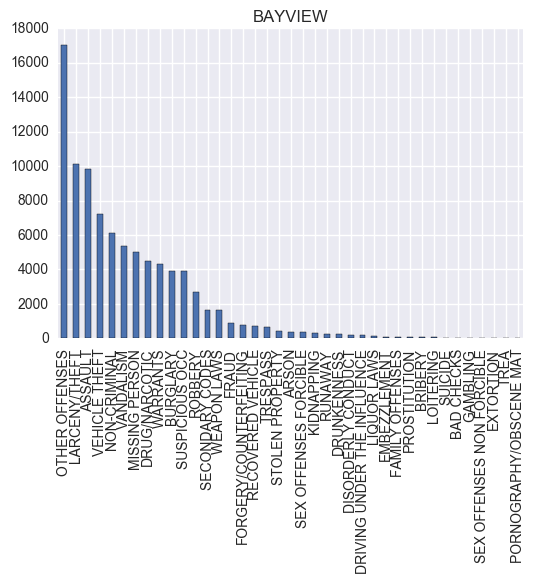

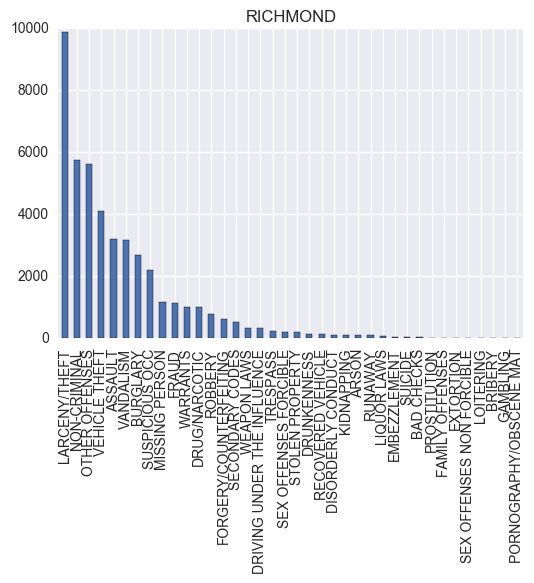

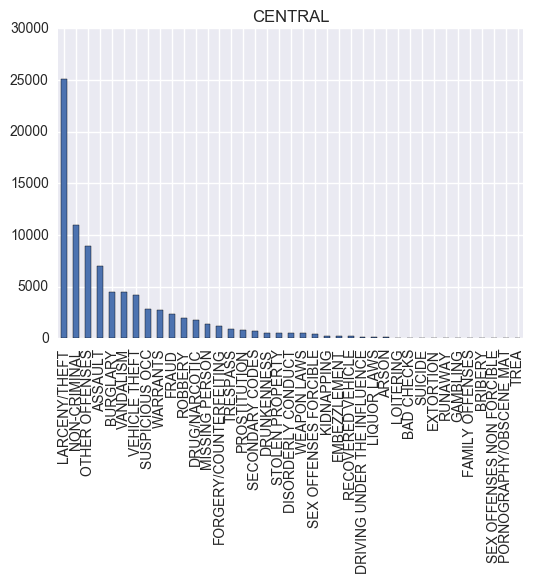

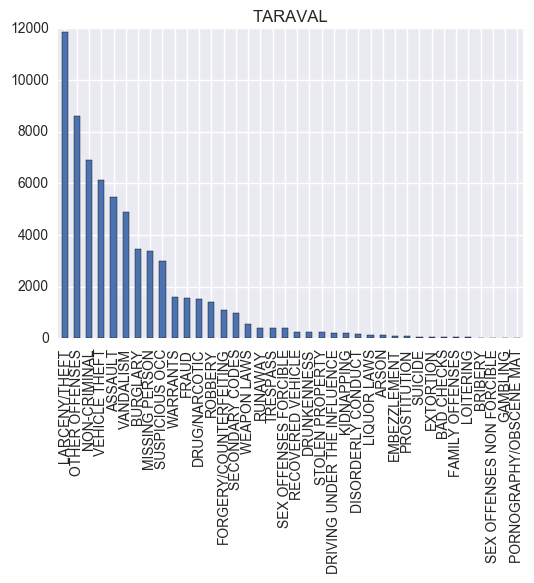

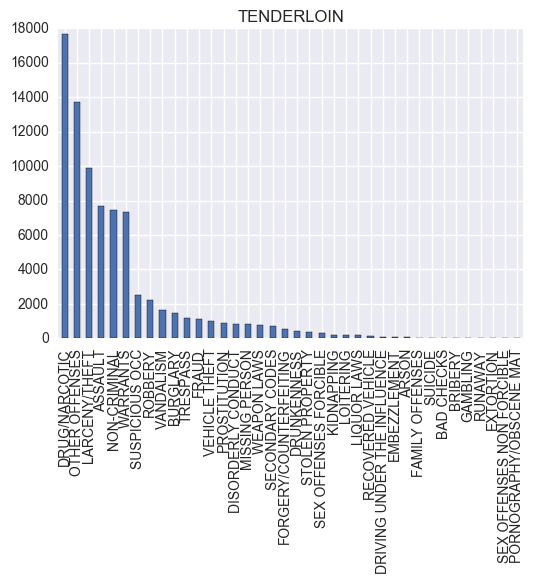

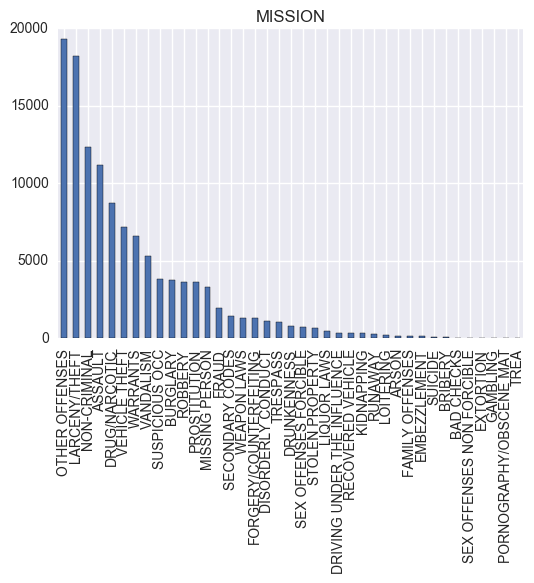

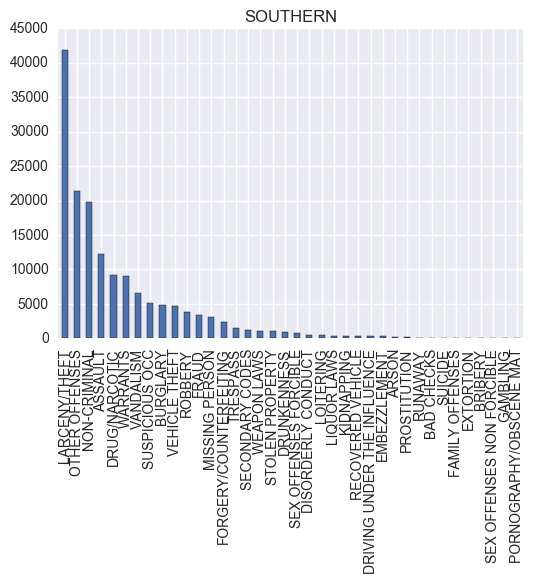

In [32]:
for i in df.PdDistrict.unique().tolist():
    df3=df[df.PdDistrict==i]
    df3.Category.value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()

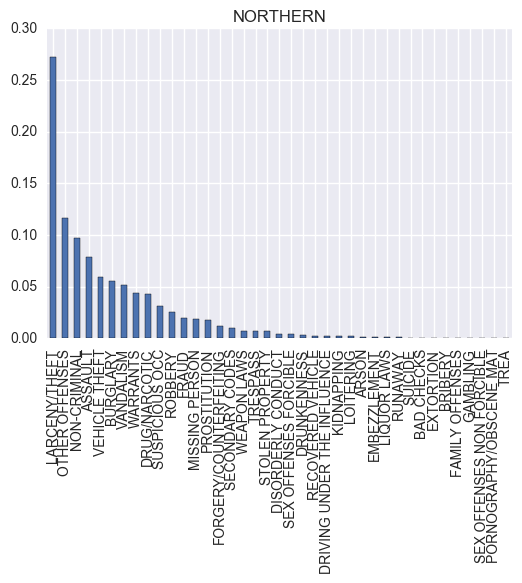

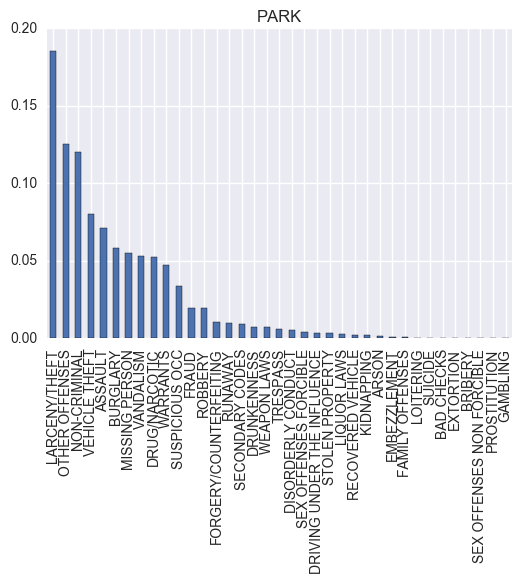

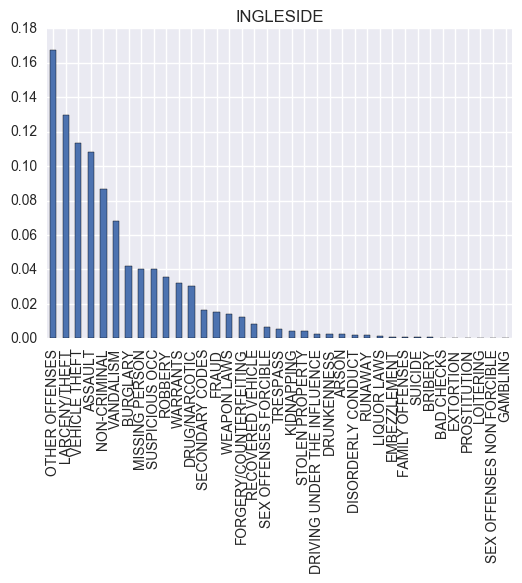

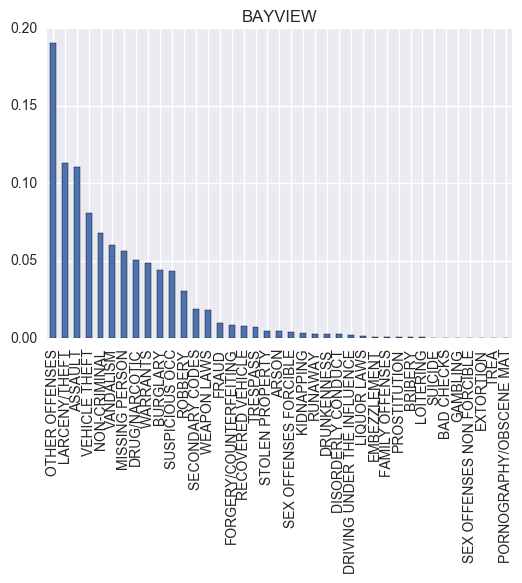

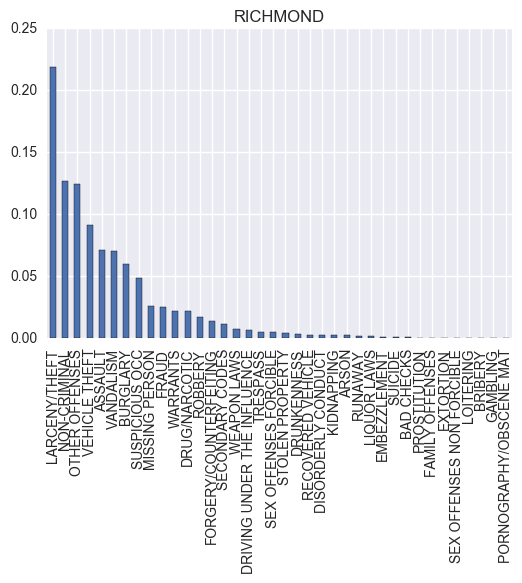

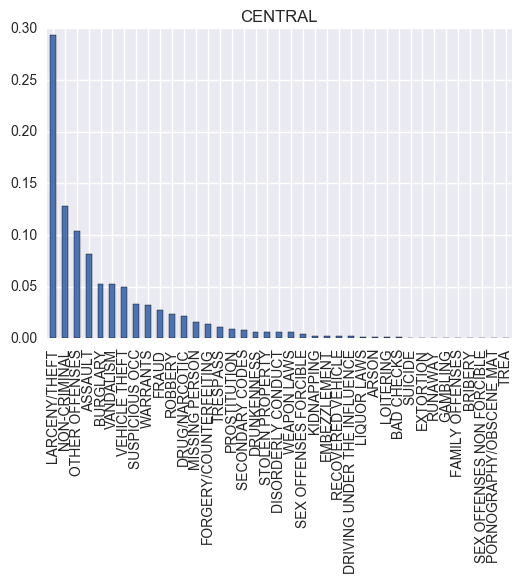

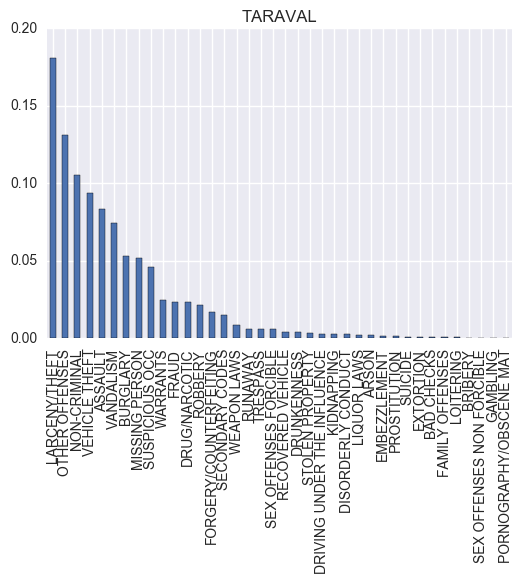

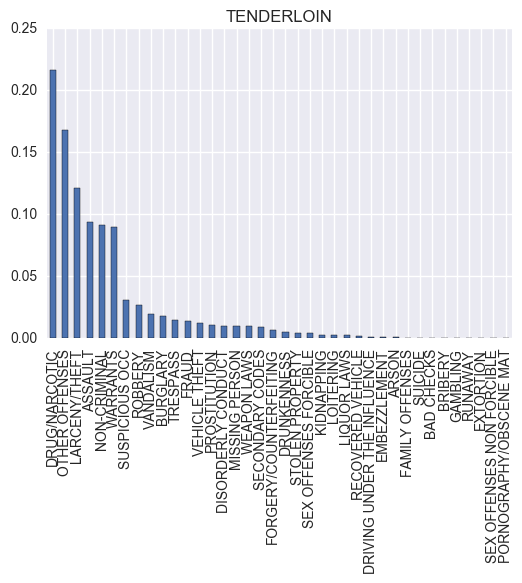

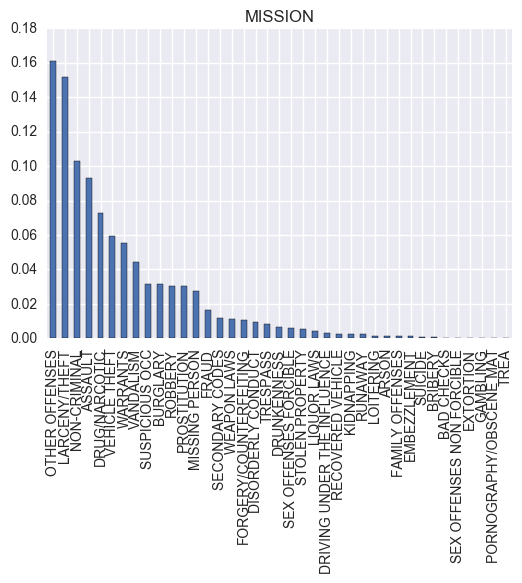

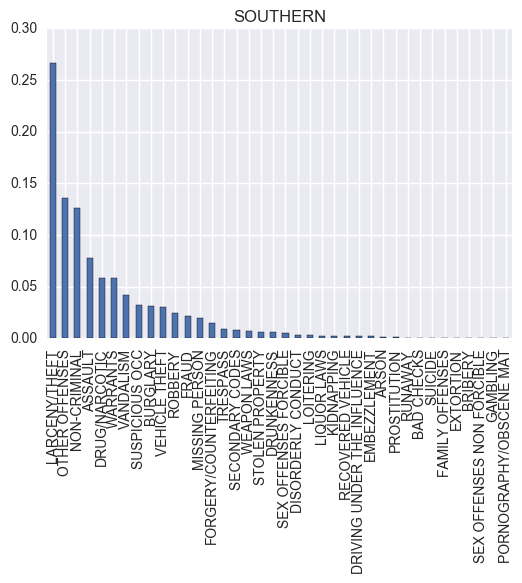

In [33]:
for i in df.PdDistrict.unique().tolist():
    df3=df[df.PdDistrict==i]
    (df3.Category.value_counts()/len(df3.Category)).plot(kind='bar')
    plt.title(i)
    plt.show()

In [34]:
df.columns

Index([u'Dates', u'Category', u'Descript', u'DayOfWeek', u'PdDistrict',
       u'Resolution', u'Address', u'X', u'Y', u'month', u'year', u'days',
       u'corner'],
      dtype='object')

In [35]:
df['dayofyear']=df.Dates.dt.dayofyear

In [36]:
df.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  month  year  days  corner  dayofyear  
0 -122.425892  37.774599      5  2015    13       1        133  
1 -122.425892  37.774599      5  2015    13       1        133  
2 -122.424363  37.800414      5  2015    13       1        133  
3 -122.426995  37.800873      5  2015    13       0        133  
4 -122.438738  37.771541      5  2015    13       0        133

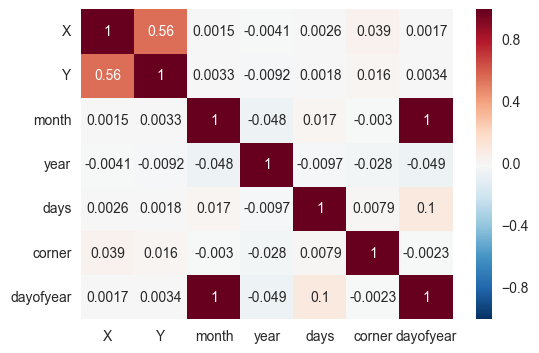

In [37]:
sns.heatmap(df.corr(),annot=True)

In [38]:
import patsy

In [39]:
X = patsy.dmatrix('~ X+Y+corner+DayOfWeek+C(year)+dayofyear+PdDistrict',data = df)

In [40]:
df.year=df.year.astype(str)

In [41]:
# year_dummy=pd.get_dummies(df.year,prefix='y')
# PdDistrict_dummy=pd.get_dummies(df.PdDistrict)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
from sklearn.cross_validation import train_test_split

In [44]:
# logreg=LogisticRegression()
# logreg_model=logreg.fit(X,df.Category)

In [45]:
Xtrain,Xtest,ytrain,ytest= train_test_split(X,df.Category,)

In [46]:
# logreg=LogisticRegression()
# logreg_model = logreg.fit(Xtrain,ytrain)

In [47]:
# predict = logreg.predict(Xtest)

In [48]:
# logreg.score(Xtest,ytest)

In [49]:
from sklearn.linear_model import SGDClassifier

In [50]:
sgm=SGDClassifier(verbose=1)

In [51]:
sgm.fit(Xtrain,ytrain)

-- Epoch 1
Norm: 3.71, NNZs: 32, Bias: -11.117936, T: 658536, Avg. loss: 12.051913
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 4.22, NNZs: 32, Bias: -11.114864, T: 1317072, Avg. loss: 6.560054
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 3.19, NNZs: 32, Bias: -11.108624, T: 1975608, Avg. loss: 4.580781
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 3.28, NNZs: 32, Bias: -11.113003, T: 2634144, Avg. loss: 3.546316
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 3.10, NNZs: 32, Bias: -11.112611, T: 3292680, Avg. loss: 2.906845
Total training time: 0.77 seconds.
-- Epoch 1
Norm: 74.00, NNZs: 32, Bias: -6.840394, T: 658536, Avg. loss: 489.002131
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 58.32, NNZs: 32, Bias: -6.834615, T: 1317072, Avg. loss: 269.782492
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 49.07, NNZs: 32, Bias: -6.830084, T: 1975608, Avg. loss: 189.747633
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 41.04, NNZs: 32, Bias: -6.826206, 

[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   31.9s finished


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=1, warm_start=False)

In [52]:
ypred=sgm.predict(Xtest)

In [53]:
sgm.score(Xtest,ytest)

0.050224815842341911

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf= RandomForestClassifier()

In [56]:
rf.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
rf_pred = rf.predict(Xtest)

ValueError: Number of features of the model must  match the input. Model n_features is 32 and  input n_features is 34 

In [57]:
rf.score(Xtest,ytest)

0.25462273304997884

In [58]:
df.columns

Index([u'Dates', u'Category', u'Descript', u'DayOfWeek', u'PdDistrict',
       u'Resolution', u'Address', u'X', u'Y', u'month', u'year', u'days',
       u'corner', u'dayofyear'],
      dtype='object')

In [61]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [62]:
df['negX']=abs(df['X'])

In [63]:
df.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  month  year  days  corner  dayofyear        negX  
0 -122.425892  37.774599      5  2015    13       1        133  122.425892  
1 -122.425892  37.774599      5  2015    13       1        133  122.425892  
2 -122.424363  37.800414      5  2015    13       1        133  122.424363  
3 -122.426995  37.800873      5  2015    13       0        133  122.426995  
4 -122.438738  37.771541      5  2015    13       0        133  122.438738

In [64]:
X = pd.get_dummies(df[['negX','Y','DayOfWeek','PdDistrict','month','year','corner']])
# year_dummy=pd.get_dummies(df.year,prefix='y')
# PdDistrict_dummy=pd.get_dummies(df.PdDistrict)

In [65]:
X.shape

(878049, 34)

In [66]:
Xtrain,Xtest,ytrain,ytest= train_test_split(X,df.Category,)

In [67]:
nbg=GaussianNB()
nbb=BernoulliNB()
nbm=MultinomialNB()

In [68]:
nbg.fit(Xtrain,ytrain)
nbb.fit(Xtrain,ytrain)
nbm.fit(Xtrain,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [69]:
print 'gaussian', nbg.score(Xtest,ytest)
print 'bernouli', nbb.score(Xtest,ytest)
print 'multinomial', nbm.score(Xtest,ytest)

gaussian 0.0226364725552
bernouli 0.229640157986
multinomial 0.228952271619


In [70]:
df.year.value_counts()

2013    75606
2014    74766
2003    73902
2004    73422
2012    71731
2005    70779
2008    70174
2006    69909
2009    69000
2007    68015
2011    66619
2010    66542
2015    27584
Name: year, dtype: int64

In [71]:
dftest=pd.read_csv('test.csv')

In [72]:
dftest.head()

Id                Dates DayOfWeek PdDistrict                   Address  \
0   0  2015-05-10 23:59:00    Sunday    BAYVIEW   2000 Block of THOMAS AV   
1   1  2015-05-10 23:51:00    Sunday    BAYVIEW        3RD ST / REVERE AV   
2   2  2015-05-10 23:50:00    Sunday   NORTHERN    2000 Block of GOUGH ST   
3   3  2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   
4   4  2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   

            X          Y  
0 -122.399588  37.735051  
1 -122.391523  37.732432  
2 -122.426002  37.792212  
3 -122.437394  37.721412  
4 -122.437394  37.721412

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
rf_pred_prob = rf.predict_proba(Xtest)

In [80]:
rf_pred_prob

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.1       ,  0.        ],
       [ 0.        ,  0.1       ,  0.        , ...,  0.03333333,
         0.        ,  0.        ],
       [ 0.        ,  0.1       ,  0.        , ...,  0.1       ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.15952381,  0.04285714],
       [ 0.        ,  0.1       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [81]:
rf.score(Xtest,ytest)

0.25334718217144314

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
lbl = LabelEncoder()

In [88]:
lbl.fit(df.PdDistrict)

LabelEncoder()

In [87]:
df.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  month  year  days  corner  dayofyear        negX  
0 -122.425892  37.774599      5  2015    13       1        133  122.425892  
1 -122.425892  37.774599      5  2015    13       1        133  122.425892  
2 -122.424363  37.800414      5  2015    13       1        133  122.424363  
3 -122.426995  37.800873      5  2015    13       0        133  122.426995  
4 -122.438738  37.771541      5  2015    13       0        133  122.438738